<a href="https://colab.research.google.com/github/hemangtk/CongiSense/blob/main/CogniSense_AML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Dataset

**Download the dataset:** [DSL-StrongPasswordData.csv](https://drive.google.com/file/d/1HMTp-Rn2dIfv-tNtfoc_EuZrTHxsPU5p/view?usp=sharing)

P.S The dataset we use here is keystroke password typing, not full smartphone app dynamics. This is used as a proxy for smartphone interaction.

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving DSL-StrongPasswordData.csv to DSL-StrongPasswordData (2).csv


In [ ]:
df = pd.read_csv('DSL-StrongPasswordData.csv')
df.head()

,subject,sessionIndex,rep,H.period,DD.period.t,UD.period.t,H.t,DD.t.i,UD.t.i,H.i,...,H.a,DD.a.n,UD.a.n,H.n,DD.n.l,UD.n.l,H.l,DD.l.Return,UD.l.Return,H.Return
0,s002,1,1,0.1491,0.3979,0.2488,0.1069,0.1674,0.0605,0.1169,...,0.1349,0.1484,0.0135,0.0932,0.3515,0.2583,0.1338,0.3509,0.2171,0.0742
1,s002,1,2,0.1111,0.3451,0.2340,0.0694,0.1283,0.0589,0.0908,...,0.1412,0.2558,0.1146,0.1146,0.2642,0.1496,0.0839,0.2756,0.1917,0.0747
2,s002,1,3,0.1328,0.2072,0.0744,0.0731,0.1291,0.0560,0.0821,...,0.1621,0.2332,0.0711,0.1172,0.2705,0.1533,0.1085,0.2847,0.1762,0.0945
3,s002,1,4,0.1291,0.2515,0.1224,0.1059,0.2495,0.1436,0.1040,...,0.1457,0.1629,0.0172,0.0866,0.2341,0.1475,0.0845,0.3232,0.2387,0.0813
4,s002,1,5,0.1249,0.2317,0.1068,0.0895,0.1676,0.0781,0.0903,...,0.1312,0.1582,0.0270,0.0884,0.2517,0.1633,0.0903,0.2517,0.1614,0.0818


In [ ]:
rows, cols = df.shape

In [ ]:
print(f"rows: {rows}")
print(f"cols: {cols}")

rows: 20400
cols: 34


In [ ]:
#Columns:
for c in df.columns:
    print(" ->", c)

 -> subject
 -> sessionIndex
 -> rep
 -> H.period
 -> DD.period.t
 -> UD.period.t
 -> H.t
 -> DD.t.i
 -> UD.t.i
 -> H.i
 -> DD.i.e
 -> UD.i.e
 -> H.e
 -> DD.e.five
 -> UD.e.five
 -> H.five
 -> DD.five.Shift.r
 -> UD.five.Shift.r
 -> H.Shift.r
 -> DD.Shift.r.o
 -> UD.Shift.r.o
 -> H.o
 -> DD.o.a
 -> UD.o.a
 -> H.a
 -> DD.a.n
 -> UD.a.n
 -> H.n
 -> DD.n.l
 -> UD.n.l
 -> H.l
 -> DD.l.Return
 -> UD.l.Return
 -> H.Return


In [ ]:
#Data Types
print(df.dtypes)

subject             object
sessionIndex         int64
rep                  int64
H.period           float64
DD.period.t        float64
UD.period.t        float64
H.t                float64
DD.t.i             float64
UD.t.i             float64
H.i                float64
DD.i.e             float64
UD.i.e             float64
H.e                float64
DD.e.five          float64
UD.e.five          float64
H.five             float64
DD.five.Shift.r    float64
UD.five.Shift.r    float64
H.Shift.r          float64
DD.Shift.r.o       float64
UD.Shift.r.o       float64
H.o                float64
DD.o.a             float64
UD.o.a             float64
H.a                float64
DD.a.n             float64
UD.a.n             float64
H.n                float64
DD.n.l             float64
UD.n.l             float64
H.l                float64
DD.l.Return        float64
UD.l.Return        float64
H.Return           float64
dtype: object


In [ ]:
#Missing Values
missing_by_col = df.isna().sum()
total_missing = int(missing_by_col.sum())

In [ ]:
print("Missing values (top 10 colss):")
print(missing_by_col.sort_values(ascending=False).head(10))
print(f"Total missing val in dataset: {total_missing}")

Missing values (top 10 colss):
subject         0
sessionIndex    0
rep             0
H.period        0
DD.period.t     0
UD.period.t     0
H.t             0
DD.t.i          0
UD.t.i          0
H.i             0
dtype: int64
Total missing val in dataset: 0


In [ ]:
# Duplicate rows
dup_count = int(df.duplicated().sum())
print(f"Duplicate rows: {dup_count}")

Duplicate rows: 0


In [ ]:
summary = df.describe(include="all").T
display(summary.head(15))

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
subject,20400,51,s002,400,NaN,NaN,NaN,NaN,NaN,NaN,NaN
sessionIndex,20400.0,NaN,NaN,NaN,4.5,2.291344,1.0,2.75,4.5,6.25,8.0
rep,20400.0,NaN,NaN,NaN,25.5,14.431223,1.0,13.0,25.5,38.0,50.0
H.period,20400.0,NaN,NaN,NaN,0.093379,0.029626,0.0014,0.0744,0.0895,0.1079,0.3761
DD.period.t,20400.0,NaN,NaN,NaN,0.264148,0.220534,0.0187,0.1469,0.20595,0.30645,12.5061
UD.period.t,20400.0,NaN,NaN,NaN,0.170769,0.226836,-0.2358,0.0498,0.1087,0.2124,12.4517
H.t,20400.0,NaN,NaN,NaN,0.085727,0.027424,0.0093,0.066,0.081,0.0998,0.2411
DD.t.i,20400.0,NaN,NaN,NaN,0.169085,0.123546,0.0011,0.1136,0.1404,0.1839,4.9197
UD.t.i,20400.0,NaN,NaN,NaN,0.083358,0.125755,-0.1621,0.0272,0.0578,0.0964,4.7999
H.i,20400.0,NaN,NaN,NaN,0.081565,0.026887,0.0032,0.062,0.0771,0.0969,0.3312


In [ ]:
num_users = df["subject"].nunique()
print(f"No of unique users: {num_users}")

No of unique users: 51


In [ ]:
print("sample user ids:", df["subject"].unique()[:10])

sample user ids: ['s002' 's003' 's004' 's005' 's007' 's008' 's010' 's011' 's012' 's013']


In [ ]:
min_session, max_session = df["sessionIndex"].min(), df["sessionIndex"].max()
min_rep, max_rep = df["rep"].min(), df["rep"].max()

In [ ]:
print(f"session range: {min_session} to {max_session}")
print(f"repetition range: {min_rep} to {max_rep}")

session range: 1 to 8
repetition range: 1 to 50


In [ ]:
#Grouping features, yeh sirf understanding ke liye not grouping them as features
hold_features = [col for col in df.columns if col.startswith("H.")]
dd_features = [col for col in df.columns if col.startswith("DD.")]
ud_features = [col for col in df.columns if col.startswith("UD.")]

In [ ]:
print("Features count by type:")
print(f"Hold time features (H): {len(hold_features)}")
print(f"Down-Down features (DD): {len(dd_features)}")
print(f"Up–Down features (UD): {len(ud_features)}")

Features count by type:
Hold time features (H): 11
Down-Down features (DD): 10
Up–Down features (UD): 10


In [ ]:
print("eg hold time cols:", hold_features[:5])
print("eg DD cols:", dd_features[:5])
print("eg UD cols:", ud_features[:5])

eg hold time cols: ['H.period', 'H.t', 'H.i', 'H.e', 'H.five']
eg DD cols: ['DD.period.t', 'DD.t.i', 'DD.i.e', 'DD.e.five', 'DD.five.Shift.r']
eg UD cols: ['UD.period.t', 'UD.t.i', 'UD.i.e', 'UD.e.five', 'UD.five.Shift.r']


In [ ]:
# Check each user has 400 samples
samples_per_user = df["subject"].value_counts()
print("Samples per user (min/median/max):",
      samples_per_user.min(), samples_per_user.median(), samples_per_user.max())

Samples per user (min/median/max): 400 400.0 400


In [ ]:
#neg vals

feature_cols = [col for col in df.columns if col.startswith(("H.", "DD.", "UD."))]

# cnting the neg vals that exist in each feature col
negative_counts = (df[feature_cols] < 0).sum()

# sorting cols by no. of neg vals (desc)
negative_counts = negative_counts.sort_values(ascending=False)

print("Top columns with negative values:")
print(negative_counts.head(10))


Top columns with negative values:
UD.a.n          6487
UD.n.l          4190
UD.i.e          4088
UD.o.a          2644
UD.t.i          1943
UD.period.t      903
UD.Shift.r.o     832
UD.e.five        559
UD.l.Return      472
H.e                0
dtype: int64


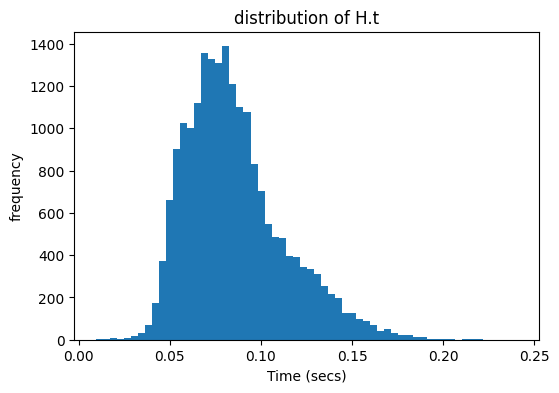

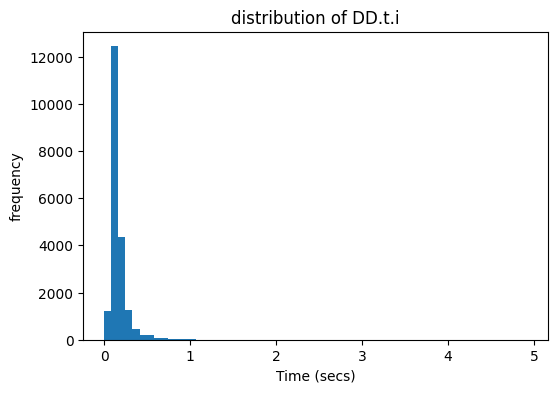

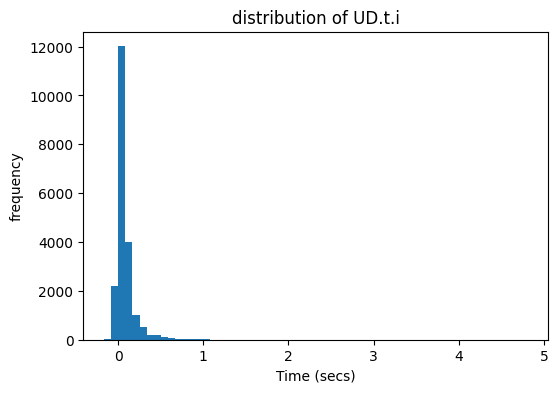

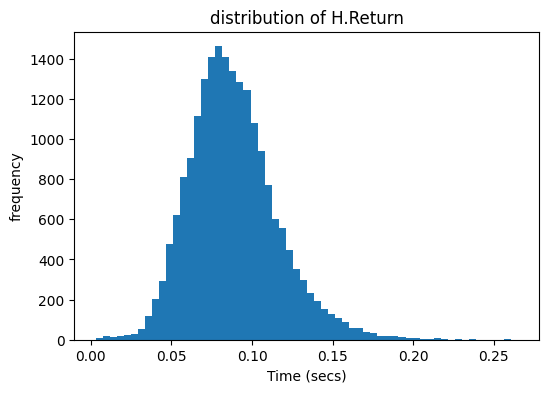

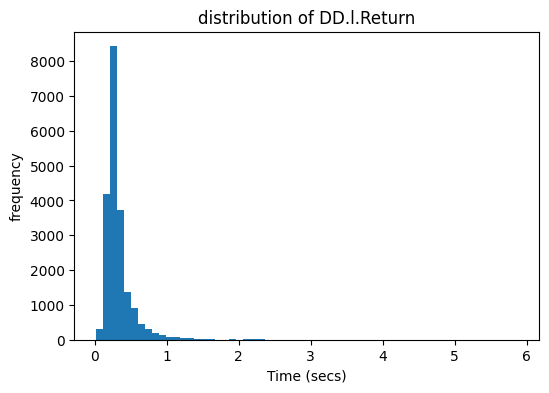

In [ ]:
import matplotlib.pyplot as plt

cols_to_plot = ["H.t", "DD.t.i", "UD.t.i", "H.Return", "DD.l.Return"]

for col in cols_to_plot:
    plt.figure(figsize=(6,4))
    plt.hist(df[col], bins=60)
    plt.title(f"distribution of {col}")
    plt.xlabel("Time (secs)")
    plt.ylabel("frequency")
    plt.show()

In [ ]:
summary = df[feature_cols].describe().T

In [ ]:
summary["IQR"] = summary["75%"] - summary["25%"]

In [ ]:
summary["upper_outlier_threshold"] = summary["75%"] + 1.5 * summary["IQR"]
summary["lower_outlier_threshold"] = summary["25%"] - 1.5 * summary["IQR"]

In [ ]:
summary["max_over_75"] = summary["max"] / summary["75%"]

In [ ]:
summary.sort_values("max_over_75", ascending=False).head(10)[
    ["min","25%","50%","75%","max","max_over_75"]
]

,min,25%,50%,75%,max,max_over_75
UD.i.e,-0.1600,0.0074,0.04120,0.09340,25.9158,277.471092
DD.i.e,0.0014,0.0893,0.12090,0.17310,25.9873,150.128827
UD.period.t,-0.2358,0.0498,0.10870,0.21240,12.4517,58.623823
UD.t.i,-0.1621,0.0272,0.05780,0.09640,4.7999,49.791494
DD.period.t,0.0187,0.1469,0.20595,0.30645,12.5061,40.809594
UD.a.n,-0.2355,-0.0090,0.02270,0.06890,2.5242,36.635704
UD.o.a,-0.2287,0.0170,0.04440,0.08030,2.8152,35.058531
UD.n.l,-0.1758,0.0235,0.09550,0.14570,3.9782,27.304049
DD.t.i,0.0011,0.1136,0.14040,0.18390,4.9197,26.752039
UD.l.Return,-0.1245,0.1141,0.16030,0.25510,5.8364,22.878871


In [ ]:
h_cols  = [c for c in df.columns if c.startswith("H.")]

In [ ]:
dd_cols = [c for c in df.columns if c.startswith("DD.")]

In [ ]:
ud_cols = [c for c in df.columns if c.startswith("UD.")]

In [ ]:
print(f"H cols: {len(h_cols)} , DD cols: {len(dd_cols)} , UD cols: {len(ud_cols)}")

H cols: 11 , DD cols: 10 , UD cols: 10


In [ ]:
df["avg_H"]  = df[h_cols].mean(axis=1)    # avg hold duration per pass attempt

In [ ]:
df["avg_DD"] = df[dd_cols].mean(axis=1)   # avg keydown→keydown gap (overall speed)

In [ ]:
df["avg_UD"] = df[ud_cols].mean(axis=1)   # avg keyup→keydown gap (overlap/hesitation)

In [ ]:
user_stats = (
    df.groupby("subject")[["avg_DD", "avg_UD", "avg_H"]]
      .mean()
      .sort_values("avg_DD")
)

In [ ]:
print("Fastest users (smallest avg_DD):")
display(user_stats.head())

Fastest users (smallest avg_DD):


,avg_DD,avg_UD,avg_H
subject,,,
s055,0.135938,0.040117,0.097857
s013,0.160790,0.083238,0.078251
s011,0.166315,0.056463,0.111274
s057,0.168153,0.086312,0.084652
s051,0.168383,0.086198,0.080160


In [ ]:
print("Slowest users (largest avg_DD):")
display(user_stats.tail())

Slowest users (largest avg_DD):


,avg_DD,avg_UD,avg_H
subject,,,
s033,0.390409,0.261347,0.126681
s016,0.414905,0.320204,0.094599
s022,0.455955,0.395982,0.059631
s049,0.500213,0.398368,0.099538
s036,0.539664,0.493556,0.046291


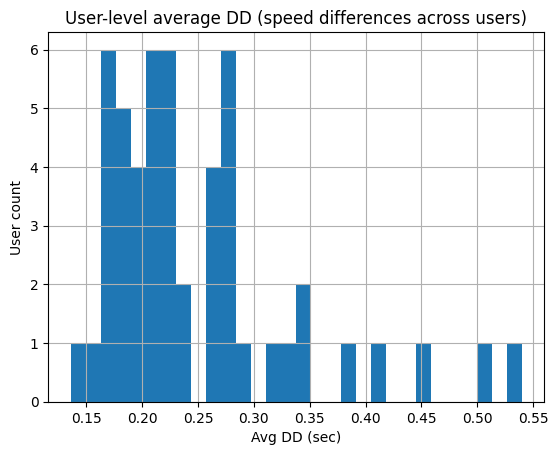

In [ ]:
plt.figure()
user_stats["avg_DD"].hist(bins=30)
plt.title("User-level average DD (speed differences across users)")
plt.xlabel("Avg DD (sec)")
plt.ylabel("User count")
plt.show()

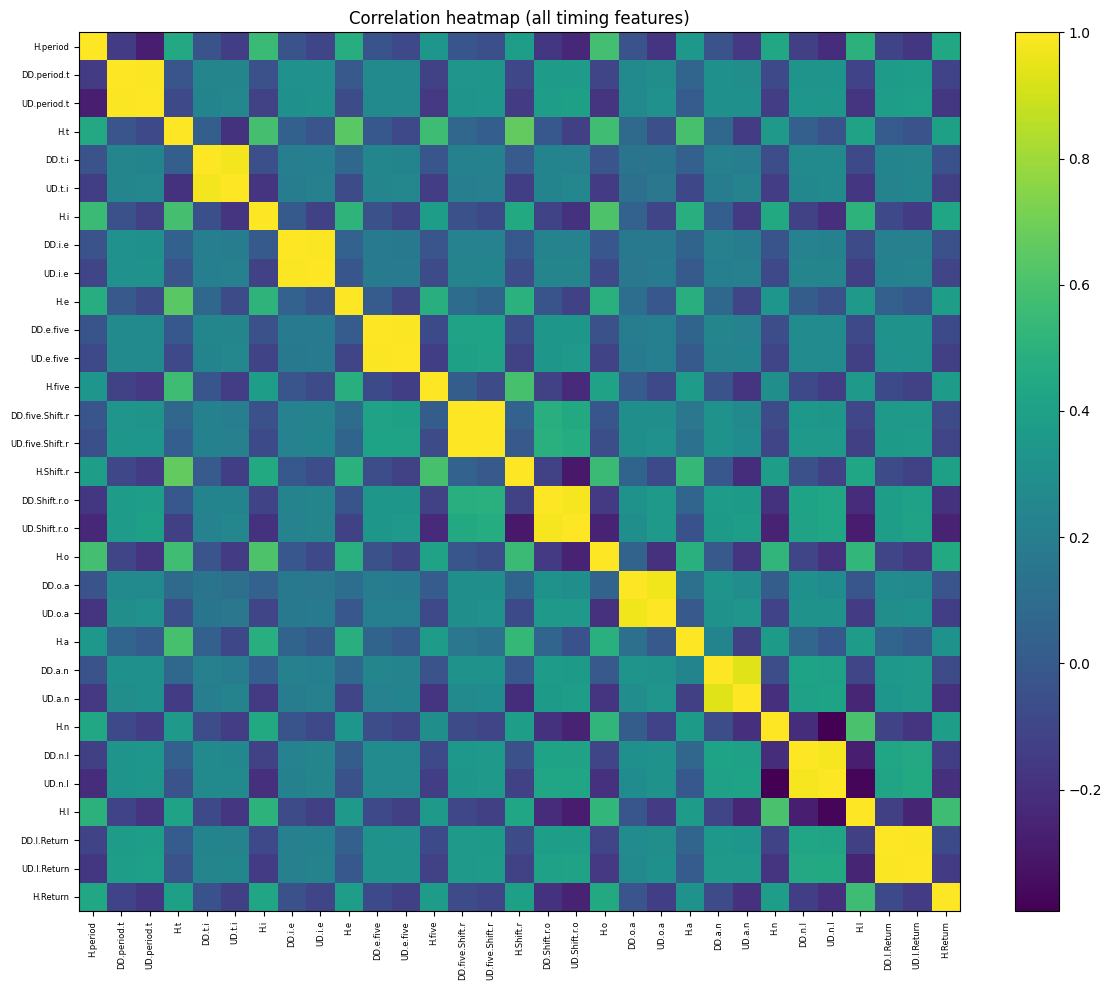

In [ ]:
corr = df[feature_cols].corr()

plt.figure(figsize=(12, 10))
plt.imshow(corr, aspect="auto")
plt.title("Correlation heatmap (all timing features)")
plt.colorbar()
plt.xticks(range(len(feature_cols)), feature_cols, rotation=90, fontsize=6)
plt.yticks(range(len(feature_cols)), feature_cols, fontsize=6)
plt.tight_layout()
plt.show()

In [ ]:
corr_abs = corr.abs()
upper = corr_abs.where(np.triu(np.ones(corr_abs.shape), k=1).astype(bool))

In [ ]:
top_pairs = (
    upper.stack()
    .sort_values(ascending=False)
    .head(20)
)

In [ ]:
print("Top 20 correlated feature pairs:")
for (f1, f2), val in top_pairs.items():
    print(f"{f1:18s}  <->  {f2:18s}  corr={val:.3f}")

Top 20 correlated feature pairs:
DD.five.Shift.r     <->  UD.five.Shift.r     corr=0.997
DD.e.five           <->  UD.e.five           corr=0.993
DD.i.e              <->  UD.i.e              corr=0.993
DD.l.Return         <->  UD.l.Return         corr=0.993
DD.period.t         <->  UD.period.t         corr=0.992
DD.Shift.r.o        <->  UD.Shift.r.o        corr=0.983
DD.n.l              <->  UD.n.l              corr=0.982
DD.t.i              <->  UD.t.i              corr=0.976
DD.o.a              <->  UD.o.a              corr=0.970
DD.a.n              <->  UD.a.n              corr=0.934
H.t                 <->  H.Shift.r           corr=0.663
H.t                 <->  H.e                 corr=0.643
H.i                 <->  H.o                 corr=0.609
H.n                 <->  H.l                 corr=0.600
H.t                 <->  H.a                 corr=0.593
H.five              <->  H.Shift.r           corr=0.593
H.t                 <->  H.i                 corr=0.589
H.period       

In [ ]:
df = df.copy()

df["avg_H"]  = df[h_cols].mean(axis=1)
df["avg_DD"] = df[dd_cols].mean(axis=1)
df["avg_UD"] = df[ud_cols].mean(axis=1)

In [ ]:
user_stability = df.groupby("subject")[["avg_DD", "avg_UD", "avg_H"]].agg(["mean", "std"])
user_stability.columns = ["_".join(col) for col in user_stability.columns]

In [ ]:
for m in ["avg_DD", "avg_UD", "avg_H"]:
    user_stability[f"{m}_cv"] = user_stability[f"{m}_std"] / (user_stability[f"{m}_mean"] + 1e-9)

In [ ]:
display(user_stability.sort_values("avg_DD_mean").head())
display(user_stability.sort_values("avg_DD_mean").tail())

,avg_DD_mean,avg_DD_std,avg_UD_mean,avg_UD_std,avg_H_mean,avg_H_std,avg_DD_cv,avg_UD_cv,avg_H_cv
subject,,,,,,,,,
s055,0.135938,0.025572,0.040117,0.028371,0.097857,0.008104,0.188111,0.707218,0.082819
s013,0.160790,0.034551,0.083238,0.035953,0.078251,0.006062,0.214886,0.431923,0.077465
s011,0.166315,0.043045,0.056463,0.045113,0.111274,0.009025,0.258815,0.798980,0.081109
s057,0.168153,0.039793,0.086312,0.040793,0.084652,0.006443,0.236647,0.472614,0.076117
s051,0.168383,0.036750,0.086198,0.037709,0.080160,0.008055,0.218254,0.437471,0.100492


,avg_DD_mean,avg_DD_std,avg_UD_mean,avg_UD_std,avg_H_mean,avg_H_std,avg_DD_cv,avg_UD_cv,avg_H_cv
subject,,,,,,,,,
s033,0.390409,0.082444,0.261347,0.084531,0.126681,0.012395,0.211175,0.323444,0.097845
s016,0.414905,0.094139,0.320204,0.096567,0.094599,0.009025,0.226894,0.301581,0.095401
s022,0.455955,0.129672,0.395982,0.130605,0.059631,0.005065,0.284398,0.329826,0.084939
s049,0.500213,0.291374,0.398368,0.289273,0.099538,0.012469,0.582499,0.726145,0.125272
s036,0.539664,0.160745,0.493556,0.161633,0.046291,0.003443,0.297861,0.327487,0.074385


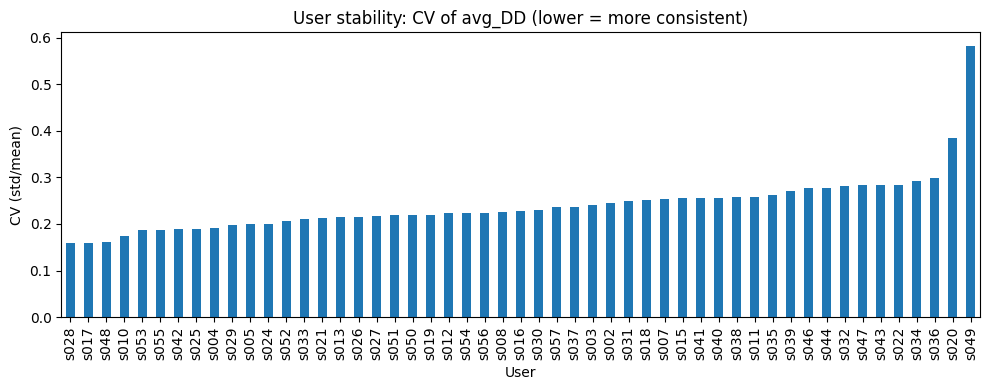

In [ ]:
plt.figure(figsize=(10, 4))
user_stability["avg_DD_cv"].sort_values().plot(kind="bar")
plt.title("User stability: CV of avg_DD (lower = more consistent)")
plt.xlabel("User")
plt.ylabel("CV (std/mean)")
plt.tight_layout()
plt.show()

In [ ]:
session_trend = df.groupby("sessionIndex")[["avg_DD", "avg_UD", "avg_H"]].mean()

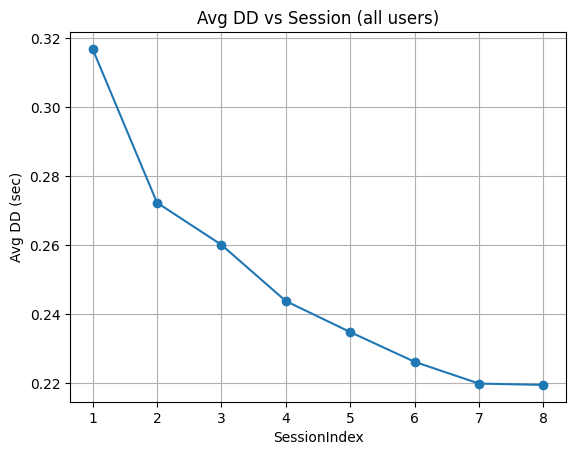

In [ ]:
plt.figure()
plt.plot(session_trend.index, session_trend["avg_DD"], marker="o")
plt.title("Avg DD vs Session (all users)")
plt.xlabel("SessionIndex")
plt.ylabel("Avg DD (sec)")
plt.grid(True)
plt.show()

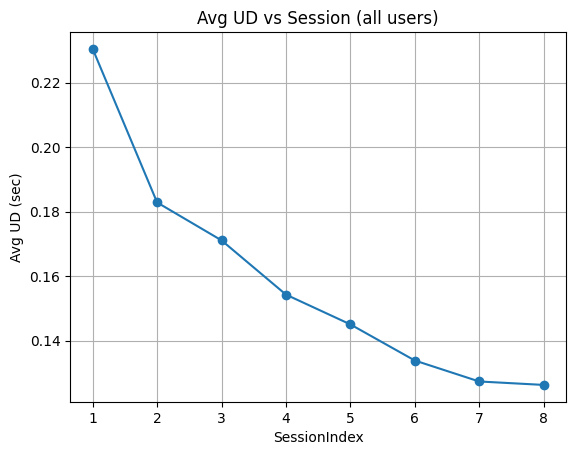

In [ ]:
plt.figure()
plt.plot(session_trend.index, session_trend["avg_UD"], marker="o")
plt.title("Avg UD vs Session (all users)")
plt.xlabel("SessionIndex")
plt.ylabel("Avg UD (sec)")
plt.grid(True)
plt.show()

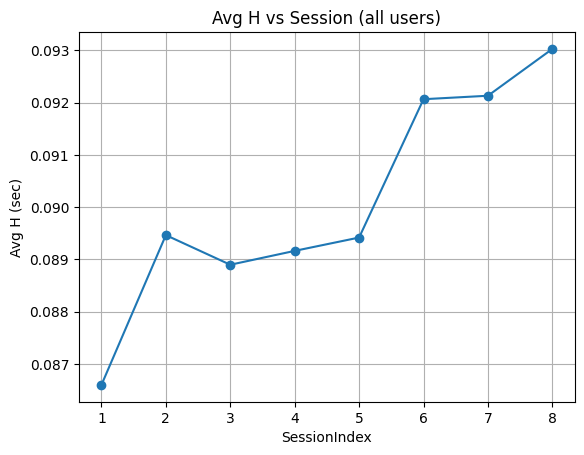

In [ ]:
plt.figure()
plt.plot(session_trend.index, session_trend["avg_H"], marker="o")
plt.title("Avg H vs Session (all users)")
plt.xlabel("SessionIndex")
plt.ylabel("Avg H (sec)")
plt.grid(True)
plt.show()

In [ ]:
sample_users = df["subject"].unique()[:6]

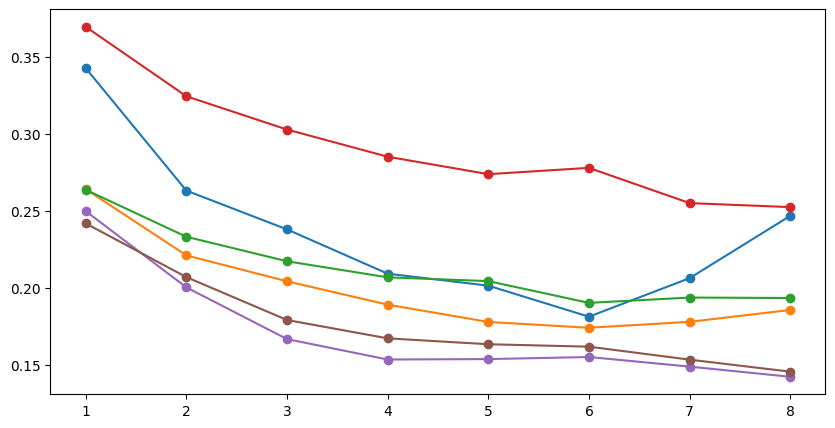

In [ ]:
plt.figure(figsize=(10, 5))
for u in sample_users:
    tmp = df[df["subject"] == u].groupby("sessionIndex")["avg_DD"].mean()
    plt.plot(tmp.index, tmp.values, marker="o", label=u)

/tmp/ipython-input-1362398079.py:4: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


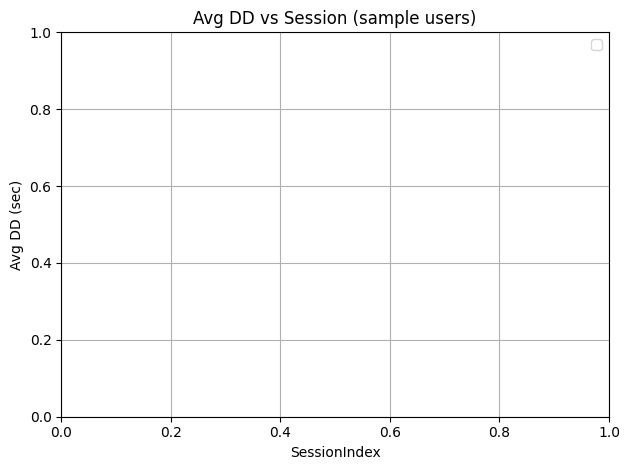

In [ ]:
plt.title("Avg DD vs Session (sample users)")
plt.xlabel("SessionIndex")
plt.ylabel("Avg DD (sec)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
check_cols = ["H.t", "DD.t.i", "UD.t.i", "DD.i.e", "UD.i.e"]
stats = df[check_cols].agg(["min", "median", "max", "std"]).T
display(stats)

,min,median,max,std
H.t,0.0093,0.0810,0.2411,0.027424
DD.t.i,0.0011,0.1404,4.9197,0.123546
UD.t.i,-0.1621,0.0578,4.7999,0.125755
DD.i.e,0.0014,0.1209,25.9873,0.226928
UD.i.e,-0.1600,0.0412,25.9158,0.228512


In [ ]:
ranges = (df[feature_cols].max() - df[feature_cols].min()).sort_values(ascending=False)
print("Top 10 widest-range features:")
display(ranges.head(10))

Top 10 widest-range features:


,0
UD.i.e,26.0758
DD.i.e,25.9859
UD.period.t,12.6875
DD.period.t,12.4874
UD.five.Shift.r,8.2052
DD.five.Shift.r,8.2008
UD.l.Return,5.9609
DD.l.Return,5.8753
UD.e.five,5.0332
UD.t.i,4.9620


In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
X = df[feature_cols].values
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
print("Before scaling: mean/std (first 3 features)")
print(df[feature_cols].mean().head(3))
print(df[feature_cols].std().head(3))

Before scaling: mean/std (first 3 features)
H.period       0.093379
DD.period.t    0.264148
UD.period.t    0.170769
dtype: float64
H.period       0.029626
DD.period.t    0.220534
UD.period.t    0.226836
dtype: float64


In [ ]:
print("After scaling: approx mean/std (first 3 features)")
print(X_scaled[:, :3].mean(axis=0))
print(X_scaled[:, :3].std(axis=0))

After scaling: approx mean/std (first 3 features)
[-1.44894989e-16  8.91661472e-17 -9.47390314e-17]
[1. 1. 1.]


In [ ]:
id_cols = ["subject", "sessionIndex", "rep"]
feature_cols = [c for c in df.columns if c not in id_cols]

print("Feature columns:", len(feature_cols))
print("Data points if clustering per attempt (rows):", df.shape[0])

session_points = df.groupby(["subject", "sessionIndex"]).size().shape[0]
print("Data points if clustering per session:", session_points)

user_points = df["subject"].nunique()
print("Data points if clustering per user:", user_points)

counts_user_session = df.groupby(["subject", "sessionIndex"]).size()
print("\nPer (user, session) repetition count stats (min/median/max):",
      counts_user_session.min(), counts_user_session.median(), counts_user_session.max())

Feature columns: 34
Data points if clustering per attempt (rows): 20400
Data points if clustering per session: 408
Data points if clustering per user: 51

Per (user, session) repetition count stats (min/median/max): 50 50.0 50


In [ ]:
session_df = (
    df
    .groupby(["subject", "sessionIndex"])[feature_cols]
    .mean()
    .reset_index()
)

print("Session-level shape:", session_df.shape)
print(session_df.head())

Session-level shape: (408, 36)
  subject  sessionIndex  H.period  DD.period.t  UD.period.t       H.t  \
0    s002             1  0.111288     0.219252     0.107964  0.082438   
1    s002             2  0.107342     0.193294     0.085952  0.083580   
2    s002             3  0.101794     0.190686     0.088892  0.084566   
3    s002             4  0.103484     0.130884     0.027400  0.088464   
4    s002             5  0.086072     0.135680     0.049608  0.082468   

     DD.t.i    UD.t.i       H.i    DD.i.e  ...       H.n    DD.n.l    UD.n.l  \
0  0.156562  0.074124  0.082876  0.154660  ...  0.089760  0.277714  0.187954   
1  0.141360  0.057780  0.072922  0.145790  ...  0.071018  0.185838  0.114820   
2  0.176922  0.092356  0.071222  0.151754  ...  0.075726  0.186824  0.111098   
3  0.149744  0.061280  0.070278  0.106332  ...  0.088460  0.210966  0.122506   
4  0.139340  0.056872  0.065508  0.106918  ...  0.078040  0.211402  0.133362   

        H.l  DD.l.Return  UD.l.Return  H.Return  

             min    median       max       std
H.t     0.038748  0.082267  0.173676  0.024658
DD.t.i  0.052628  0.151598  0.601052  0.073674
UD.t.i -0.027360  0.068360  0.562304  0.077342
DD.i.e  0.049606  0.132155  0.961698  0.094779
UD.i.e -0.062542  0.053095  0.878596  0.098390


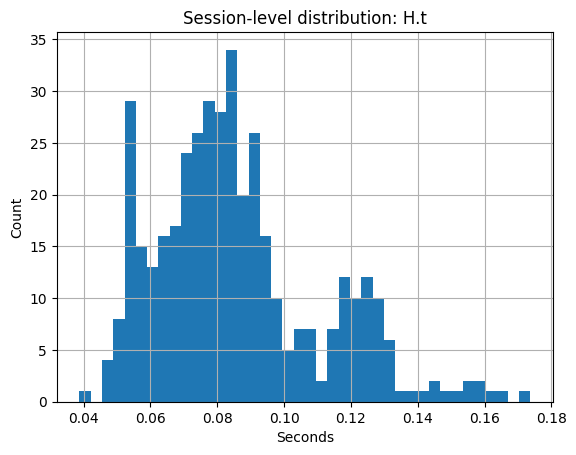

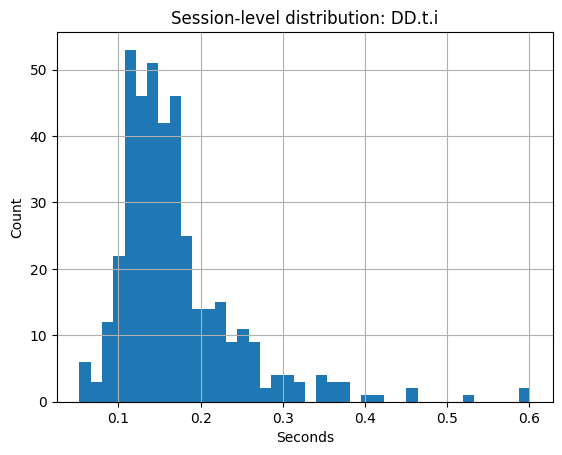

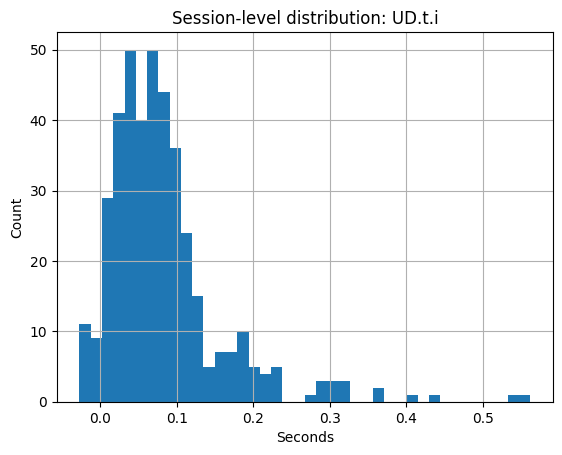

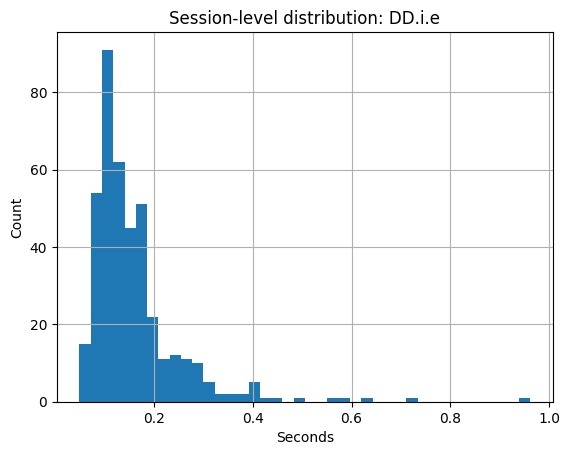

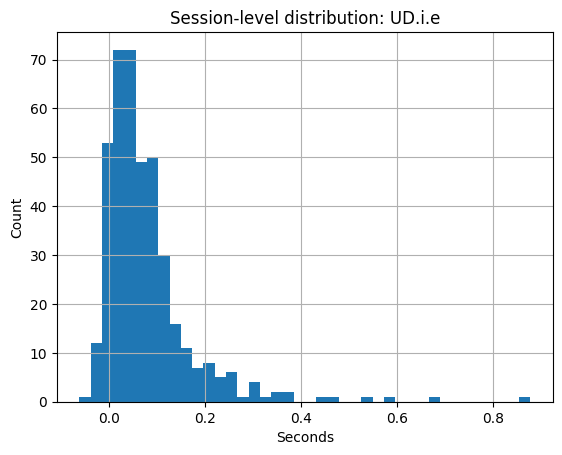

In [ ]:
check_cols = ["H.t", "DD.t.i", "UD.t.i", "DD.i.e", "UD.i.e"]

stats = session_df[check_cols].agg(["min", "median", "max", "std"]).T
print(stats)

for col in check_cols:
    plt.figure()
    session_df[col].hist(bins=40)
    plt.title(f"Session-level distribution: {col}")
    plt.xlabel("Seconds")
    plt.ylabel("Count")
    plt.show()

In [ ]:
from sklearn.preprocessing import RobustScaler

X_df = session_df.copy()

q = X_df[feature_cols].quantile([0.01, 0.05, 0.25, 0.50, 0.75, 0.95, 0.99]).T
q.columns = ["p01","p05","p25","p50","p75","p95","p99"]
q["p99_over_p75"] = q["p99"] / (q["p75"] + 1e-9)
q_sorted = q.sort_values("p99_over_p75", ascending=False)

print("Top 10 features with largest (p99 / p75):")
print(q_sorted.head(10)[["p25","p50","p75","p95","p99","p99_over_p75"]])

Top 10 features with largest (p99 / p75):
                   p25       p50       p75       p95       p99  p99_over_p75
UD.a.n        0.002942  0.029242  0.066144  0.157549  0.312231      4.720443
UD.i.e        0.020563  0.053095  0.100735  0.249293  0.471209      4.677704
UD.n.l        0.040861  0.104723  0.151250  0.309772  0.543520      3.593520
UD.o.a        0.030930  0.054966  0.085995  0.225845  0.308436      3.586692
UD.t.i        0.036282  0.068360  0.102776  0.223641  0.360433      3.506989
UD.period.t   0.069865  0.118551  0.219959  0.489907  0.734903      3.341092
UD.Shift.r.o  0.071192  0.116199  0.192159  0.396861  0.623487      3.244651
UD.l.Return   0.137939  0.187610  0.267269  0.488849  0.851099      3.184429
DD.i.e        0.103280  0.132155  0.179840  0.312821  0.547496      3.044339
avg_UD        0.095440  0.135840  0.191862  0.354253  0.511165      2.664229


In [ ]:
LOW_Q  = 0.01
HIGH_Q = 0.99

lower_caps = X_df[feature_cols].quantile(LOW_Q)
upper_caps = X_df[feature_cols].quantile(HIGH_Q)

X_capped = X_df[feature_cols].clip(lower=lower_caps, upper=upper_caps, axis=1)

num_lower_clipped = (X_df[feature_cols].lt(lower_caps)).sum().sum()
num_upper_clipped = (X_df[feature_cols].gt(upper_caps)).sum().sum()
total_values = X_df[feature_cols].shape[0] * X_df[feature_cols].shape[1]

In [ ]:
print("Winsorization summary:")
print("LOW_Q / HIGH_Q:", LOW_Q, HIGH_Q)
print("Total values:", total_values)
print("Lower-clipped:", int(num_lower_clipped))
print("Upper-clipped:", int(num_upper_clipped))
print("Percent clipped:", 100.0 * (num_lower_clipped + num_upper_clipped) / total_values)

Winsorization summary:
LOW_Q / HIGH_Q: 0.01 0.99
Total values: 13872
Lower-clipped: 170
Upper-clipped: 170
Percent clipped: 2.450980392156863


In [ ]:
caps_preview = pd.DataFrame({
    "lower_cap": lower_caps,
    "upper_cap": upper_caps,
    "min_before": X_df[feature_cols].min(),
    "max_before": X_df[feature_cols].max(),
}).loc[q_sorted.head(10).index]

In [ ]:
print("Caps preview (top 10):")
print(caps_preview)

Caps preview (top 10):
              lower_cap  upper_cap  min_before  max_before
UD.a.n        -0.046276   0.312231   -0.088730    0.338806
UD.i.e        -0.025441   0.471209   -0.062542    0.878596
UD.n.l        -0.053798   0.543520   -0.075178    0.785860
UD.o.a        -0.024063   0.308436   -0.032878    0.422258
UD.t.i        -0.021853   0.360433   -0.027360    0.562304
UD.period.t   -0.011544   0.734903   -0.056392    0.957896
UD.Shift.r.o  -0.011224   0.623487   -0.020106    1.103922
UD.l.Return   -0.000154   0.851099   -0.030870    1.553246
DD.i.e         0.065727   0.547496    0.049606    0.961698
avg_UD         0.026539   0.511165    0.006227    0.900037


In [ ]:
scaler = RobustScaler(quantile_range=(25.0, 75.0))
X_scaled = scaler.fit_transform(X_capped)

In [ ]:
print("After Robust scaling sanity check (first 5 features):")
med_after = np.median(X_scaled, axis=0)[:5]
iqr_after = (np.percentile(X_scaled, 75, axis=0) - np.percentile(X_scaled, 25, axis=0))[:5]
print("Median ~ 0:", med_after)
print("IQR ~ 1:   ", iqr_after)

After Robust scaling sanity check (first 5 features):
Median ~ 0: [ 0.00000000e+00  0.00000000e+00  0.00000000e+00 -2.53920149e-16
 -2.06757354e-16]
IQR ~ 1:    [1. 1. 1. 1. 1.]


In [ ]:
print("Final shape of X_scaled:", X_scaled.shape)

Final shape of X_scaled: (408, 34)


In [ ]:
avg_cols = ["avg_H", "avg_DD", "avg_UD"]

base_feature_cols = [c for c in feature_cols if c not in avg_cols]

corr_all = session_df[base_feature_cols + avg_cols].corr()

for c in avg_cols:
    print(f"Top correlations with {c}:")
    print(
        corr_all[c]
        .drop(c)
        .abs()
        .sort_values(ascending=False)
        .head(10)
    )

Top correlations with avg_H:
H.o          0.889262
H.t          0.861618
H.i          0.829778
H.Shift.r    0.811081
H.e          0.801684
H.a          0.800131
H.l          0.795092
H.period     0.777226
H.five       0.749857
H.Return     0.747979
Name: avg_H, dtype: float64
Top correlations with avg_DD:
avg_UD             0.979999
UD.five.Shift.r    0.900922
DD.five.Shift.r    0.891600
DD.l.Return        0.870963
UD.l.Return        0.868612
DD.Shift.r.o       0.867763
DD.i.e             0.864912
DD.period.t        0.861416
UD.i.e             0.859925
DD.n.l             0.857232
Name: avg_DD, dtype: float64
Top correlations with avg_UD:
avg_DD             0.979999
UD.l.Return        0.881111
DD.Shift.r.o       0.877647
UD.five.Shift.r    0.874293
UD.i.e             0.871381
UD.Shift.r.o       0.866256
DD.l.Return        0.861687
UD.period.t        0.859346
DD.n.l             0.859230
DD.period.t        0.857491
Name: avg_UD, dtype: float64


In [ ]:
final_feature_cols = [c for c in feature_cols if c not in ["avg_H", "avg_DD", "avg_UD"]]

print("Final feature count:", len(final_feature_cols))

X_final = X_scaled[:, [feature_cols.index(c) for c in final_feature_cols]]

print("Final X shape:", X_final.shape)

meta = session_df[["subject", "sessionIndex"]].reset_index(drop=True)

print("Meta shape:", meta.shape)

Final feature count: 31
Final X shape: (408, 31)
Meta shape: (408, 2)


In [ ]:
print("Checking preprocessed data...")
print(f"X_final shape: {X_final.shape}")
print(f"Meta (subject, session) shape: {meta.shape if 'meta' in dir() else 'meta not found'}")

print(f"\nFirst 3 rows of X_final:")
print(X_final[:3, :5])

Checking preprocessed data...
X_final shape: (408, 31)
Meta (subject, session) shape: (408, 2)

First 3 rows of X_final:
[[ 0.80857024  0.00732965 -0.0705358   0.00625801  0.07396591]
 [ 0.65286957 -0.17048619 -0.21719056  0.04805124 -0.15255096]
 [ 0.43395742 -0.18835134 -0.19760284  0.08413541  0.37733937]]


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('DSL-StrongPasswordData.csv')

print("✅ Libraries imported and data loaded!")
print(f"Dataset shape: {df.shape}")
print(f"Rows: {df.shape[0]}, Columns: {df.shape[1]}")

✅ Libraries imported and data loaded!
Dataset shape: (20400, 34)
Rows: 20400, Columns: 34


In [ ]:
from google.colab import files

print("📁 Click 'Choose Files' and select your DSL-StrongPasswordData.csv file")
uploaded = files.upload()


📁 Click 'Choose Files' and select your DSL-StrongPasswordData.csv file


Saving DSL-StrongPasswordData.csv to DSL-StrongPasswordData (3).csv


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('DSL-StrongPasswordData.csv')

print("Libraries imported and data loaded!")
print(f"Dataset shape: {df.shape}")
print(f"Rows: {df.shape[0]}, Columns: {df.shape[1]}")
print(f"\nFirst 3 rows:")
df.head(3)

Libraries imported and data loaded!
Dataset shape: (20400, 34)
Rows: 20400, Columns: 34

First 3 rows:


,subject,sessionIndex,rep,H.period,DD.period.t,UD.period.t,H.t,DD.t.i,UD.t.i,H.i,...,H.a,DD.a.n,UD.a.n,H.n,DD.n.l,UD.n.l,H.l,DD.l.Return,UD.l.Return,H.Return
0,s002,1,1,0.1491,0.3979,0.2488,0.1069,0.1674,0.0605,0.1169,...,0.1349,0.1484,0.0135,0.0932,0.3515,0.2583,0.1338,0.3509,0.2171,0.0742
1,s002,1,2,0.1111,0.3451,0.2340,0.0694,0.1283,0.0589,0.0908,...,0.1412,0.2558,0.1146,0.1146,0.2642,0.1496,0.0839,0.2756,0.1917,0.0747
2,s002,1,3,0.1328,0.2072,0.0744,0.0731,0.1291,0.0560,0.0821,...,0.1621,0.2332,0.0711,0.1172,0.2705,0.1533,0.1085,0.2847,0.1762,0.0945


In [ ]:
id_cols = ["subject", "sessionIndex", "rep"]

h_cols = [c for c in df.columns if c.startswith("H.")]
dd_cols = [c for c in df.columns if c.startswith("DD.")]
ud_cols = [c for c in df.columns if c.startswith("UD.")]

feature_cols = h_cols + dd_cols + ud_cols

print(" Column Types Identified:")
print(f"   - Identifier columns: {len(id_cols)} → {id_cols}")
print(f"   - Hold time features (H.): {len(h_cols)}")
print(f"   - Down-Down features (DD.): {len(dd_cols)}")
print(f"   - Up-Down features (UD.): {len(ud_cols)}")
print(f"   - Total features: {len(feature_cols)}")

 Column Types Identified:
   - Identifier columns: 3 → ['subject', 'sessionIndex', 'rep']
   - Hold time features (H.): 11
   - Down-Down features (DD.): 10
   - Up-Down features (UD.): 10
   - Total features: 31


In [ ]:
session_df = (
    df
    .groupby(["subject", "sessionIndex"])[feature_cols]
    .mean()
    .reset_index()
)

print("Aggregation Complete!")
print(f"   Before: {df.shape[0]} rows (every single typing attempt)")
print(f"   After:  {session_df.shape[0]} rows (one per user-session)")
print(f"\n   Calculation: 51 users × 8 sessions = {51 * 8} rows ✓")
print(f"\n   Features kept: {len(feature_cols)}")

Aggregation Complete!
   Before: 20400 rows (every single typing attempt)
   After:  408 rows (one per user-session)

   Calculation: 51 users × 8 sessions = 408 rows ✓

   Features kept: 31


In [ ]:
LOW_Q = 0.01
HIGH_Q = 0.99

lower_caps = session_df[feature_cols].quantile(LOW_Q)
upper_caps = session_df[feature_cols].quantile(HIGH_Q)

num_lower = (session_df[feature_cols] < lower_caps).sum().sum()
num_upper = (session_df[feature_cols] > upper_caps).sum().sum()
total_values = session_df[feature_cols].size

X_capped = session_df[feature_cols].clip(lower=lower_caps, upper=upper_caps, axis=1)

print(" Winsorization Complete!")
print(f"   Capping range: {LOW_Q*100}% to {HIGH_Q*100}%")
print(f"   Total values: {total_values}")
print(f"   Values clipped: {num_lower + num_upper} ({100*(num_lower + num_upper)/total_values:.2f}%)")
print(f"\n   Shape after capping: {X_capped.shape}")

 Winsorization Complete!
   Capping range: 1.0% to 99.0%
   Total values: 12648
   Values clipped: 310 (2.45%)

   Shape after capping: (408, 31)


In [ ]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler(quantile_range=(25.0, 75.0))
X_scaled = scaler.fit_transform(X_capped)

# Sanity check
print("⚖️ Robust Scaling Complete!")
print(f"   Shape: {X_scaled.shape}")
print(f"\n   Sanity check (first 5 features):")
print(f"   Median ≈ 0: {np.median(X_scaled, axis=0)[:5].round(4)}")

iqr = np.percentile(X_scaled, 75, axis=0) - np.percentile(X_scaled, 25, axis=0)
print(f"   IQR ≈ 1:    {iqr[:5].round(4)}")

⚖️ Robust Scaling Complete!
   Shape: (408, 31)

   Sanity check (first 5 features):
   Median ≈ 0: [ 0. -0.  0.  0.  0.]
   IQR ≈ 1:    [1. 1. 1. 1. 1.]


In [ ]:
meta = session_df[["subject", "sessionIndex"]].copy()

print(" Metadata Saved!")
print(f"   Shape: {meta.shape}")
print(f"\n   First 5 rows:")
print(meta.head())
print(f"\n   This tells us which row belongs to which user and session")

 Metadata Saved!
   Shape: (408, 2)

   First 5 rows:
  subject  sessionIndex
0    s002             1
1    s002             2
2    s002             3
3    s002             4
4    s002             5

   This tells us which row belongs to which user and session


In [ ]:
from sklearn.decomposition import PCA

pca_full = PCA()
pca_full.fit(X_scaled)

var_explained = pca_full.explained_variance_ratio_
cumulative_var = np.cumsum(var_explained)

print("🔬 PCA Analysis Complete!")
print(f"   Total components possible: {len(var_explained)}")
print(f"\n   Variance explained by each Principal Component:")
print("   " + "-" * 45)

for i in range(min(12, len(var_explained))):
    bar = "█" * int(var_explained[i] * 50)
    print(f"   PC{i+1:2d}: {var_explained[i]*100:5.2f}% | Cumul: {cumulative_var[i]*100:5.2f}% | {bar}")

🔬 PCA Analysis Complete!
   Total components possible: 31

   Variance explained by each Principal Component:
   ---------------------------------------------
   PC 1: 50.33% | Cumul: 50.33% | █████████████████████████
   PC 2: 18.34% | Cumul: 68.66% | █████████
   PC 3:  5.79% | Cumul: 74.45% | ██
   PC 4:  3.97% | Cumul: 78.42% | █
   PC 5:  3.44% | Cumul: 81.86% | █
   PC 6:  2.94% | Cumul: 84.80% | █
   PC 7:  2.55% | Cumul: 87.35% | █
   PC 8:  2.22% | Cumul: 89.57% | █
   PC 9:  1.70% | Cumul: 91.27% | 
   PC10:  1.48% | Cumul: 92.75% | 
   PC11:  1.27% | Cumul: 94.02% | 
   PC12:  1.17% | Cumul: 95.20% | 


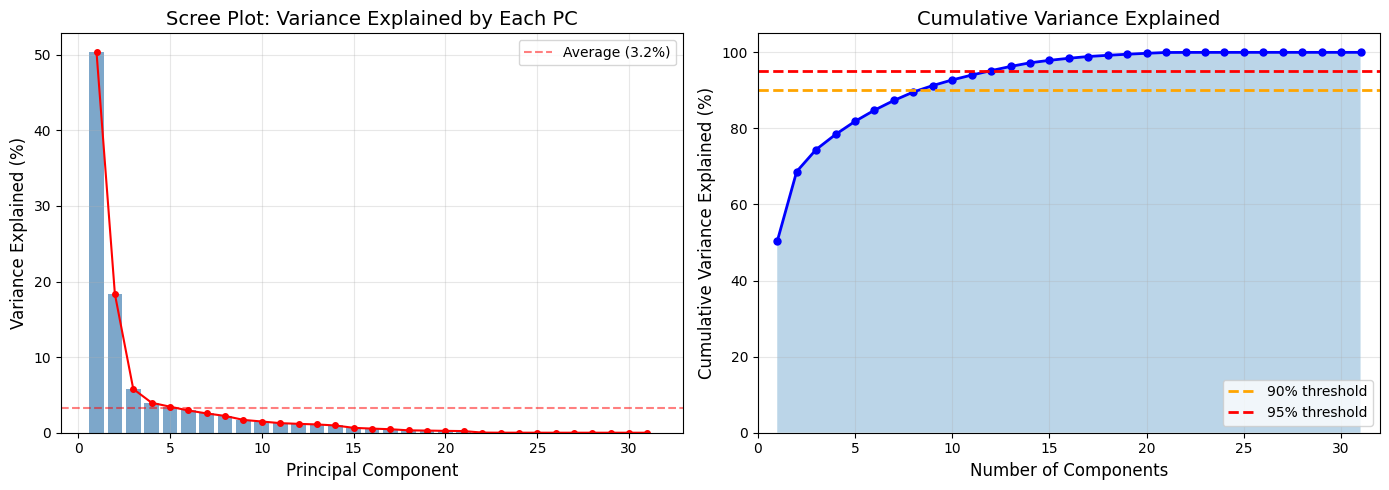


📊 How to read these plots:
   Left plot:  Look for the 'elbow' where bars suddenly get small
   Right plot: Find where the line crosses 90% or 95%


In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))
ax1 = axes[0]
components = range(1, len(var_explained) + 1)
ax1.bar(components, var_explained * 100, color='steelblue', alpha=0.7)
ax1.plot(components, var_explained * 100, 'ro-', markersize=4)
ax1.set_xlabel('Principal Component', fontsize=12)
ax1.set_ylabel('Variance Explained (%)', fontsize=12)
ax1.set_title('Scree Plot: Variance Explained by Each PC', fontsize=14)
ax1.axhline(y=100/31, color='red', linestyle='--', alpha=0.5, label=f'Average ({100/31:.1f}%)')
ax1.legend()
ax1.grid(True, alpha=0.3)

# Plot 2: Cumulative variance (Line chart)
ax2 = axes[1]
ax2.plot(components, cumulative_var * 100, 'b-o', markersize=5, linewidth=2)
ax2.axhline(y=90, color='orange', linestyle='--', linewidth=2, label='90% threshold')
ax2.axhline(y=95, color='red', linestyle='--', linewidth=2, label='95% threshold')
ax2.fill_between(components, cumulative_var * 100, alpha=0.3)
ax2.set_xlabel('Number of Components', fontsize=12)
ax2.set_ylabel('Cumulative Variance Explained (%)', fontsize=12)
ax2.set_title('Cumulative Variance Explained', fontsize=14)
ax2.legend(loc='lower right')
ax2.grid(True, alpha=0.3)
ax2.set_xlim(0, 32)
ax2.set_ylim(0, 105)

plt.tight_layout()
plt.show()

print("\n📊 How to read these plots:")
print("   Left plot:  Look for the 'elbow' where bars suddenly get small")
print("   Right plot: Find where the line crosses 90% or 95%")

In [ ]:
eigenvalues = pca_full.explained_variance_
n_kaiser = np.sum(eigenvalues > 1)

n_90 = np.argmax(cumulative_var >= 0.90) + 1  # For 90%
n_95 = np.argmax(cumulative_var >= 0.95) + 1  # For 95%

n_elbow = 3  # Based on our visual inspection

print(" How Many Components to Keep?")
print("=" * 50)
print(f"\n   Method 1 - Kaiser Criterion (eigenvalue > 1):")
print(f"   → Keep {n_kaiser} components")
print(f"\n   Method 2 - Variance Thresholds:")
print(f"   → For 90% variance: Keep {n_90} components")
print(f"   → For 95% variance: Keep {n_95} components")
print(f"\n   Method 3 - Elbow Method (visual):")
print(f"   → Keep ~{n_elbow} components (where curve bends)")

print("\n" + "=" * 50)
print(" RECOMMENDATION:")
print(f"   We'll use {n_90} components (90% variance threshold)")
print(f"   This gives us {cumulative_var[n_90-1]*100:.2f}% of information")
print(f"   Dimensionality reduction: 31 → {n_90} features ({100*(1-n_90/31):.1f}% reduction)")

 How Many Components to Keep?

   Method 1 - Kaiser Criterion (eigenvalue > 1):
   → Keep 5 components

   Method 2 - Variance Thresholds:
   → For 90% variance: Keep 9 components
   → For 95% variance: Keep 12 components

   Method 3 - Elbow Method (visual):
   → Keep ~3 components (where curve bends)

 RECOMMENDATION:
   We'll use 9 components (90% variance threshold)
   This gives us 91.27% of information
   Dimensionality reduction: 31 → 9 features (71.0% reduction)


In [ ]:
eigenvalues = pca_full.explained_variance_
n_kaiser = np.sum(eigenvalues > 1)

# Method 2: Variance threshold (e.g., keep 90% or 95% of variance)
n_90 = np.argmax(cumulative_var >= 0.90) + 1  # +1 because index starts at 0
n_95 = np.argmax(cumulative_var >= 0.95) + 1

# Method 3: Elbow method (visual inspection - we saw this in the plot)
n_elbow = 3  # Approximately where the "elbow" is

print(" How Many Components to Keep?")
print("=" * 50)
print(f"\n   Method 1 - Kaiser Criterion (eigenvalue > 1):")
print(f"   → Keep {n_kaiser} components")
print(f"\n   Method 2 - Variance Thresholds:")
print(f"   → For 90% variance: Keep {n_90} components")
print(f"   → For 95% variance: Keep {n_95} components")
print(f"\n   Method 3 - Elbow Method (visual):")
print(f"   → Keep ~{n_elbow} components (where curve bends)")

# Our choice
n_components = n_90  # We'll use 90% variance threshold

print("\n" + "=" * 50)
print(f" RECOMMENDATION:")
print(f"   We'll use {n_components} components (90% variance threshold)")
print(f"   This gives us {cumulative_var[n_components-1]*100:.2f}% of information")
print(f"   Dimensionality reduction: 31 → {n_components} features ({100*(1-n_components/31):.1f}% reduction)")

 How Many Components to Keep?

   Method 1 - Kaiser Criterion (eigenvalue > 1):
   → Keep 5 components

   Method 2 - Variance Thresholds:
   → For 90% variance: Keep 9 components
   → For 95% variance: Keep 12 components

   Method 3 - Elbow Method (visual):
   → Keep ~3 components (where curve bends)

 RECOMMENDATION:
   We'll use 9 components (90% variance threshold)
   This gives us 91.27% of information
   Dimensionality reduction: 31 → 9 features (71.0% reduction)


In [ ]:
n_components = 9

pca_final = PCA(n_components=n_components)
X_pca = pca_final.fit_transform(X_scaled)

print(" PCA Transformation Complete!")
print(f"\n   BEFORE: X_scaled shape = {X_scaled.shape}")
print(f"   AFTER:  X_pca shape    = {X_pca.shape}")
print(f"\n   We went from 31 features → 9 principal components!")
print(f"\n   First 5 rows of transformed data:")
print(X_pca[:5].round(3))

 PCA Transformation Complete!

   BEFORE: X_scaled shape = (408, 31)
   AFTER:  X_pca shape    = (408, 9)

   We went from 31 features → 9 principal components!

   First 5 rows of transformed data:
[[ 2.145  1.135  1.144  0.729  2.251 -1.063 -2.527 -1.099 -0.249]
 [-0.215  0.213  0.38   0.833  0.971 -0.798 -1.566 -1.14  -0.196]
 [-0.733 -0.014  0.559  0.829 -0.097 -0.892 -1.009 -0.515  0.107]
 [-1.757  0.03   0.331  0.22  -0.332 -1.001 -0.911 -0.66  -0.237]
 [-1.741 -0.816 -0.003  0.098 -0.585 -1.577 -0.992 -0.665  0.262]]


In [ ]:
loadings = pd.DataFrame(
    pca_final.components_.T,  # Transpose to get features as rows
    columns=[f'PC{i+1}' for i in range(n_components)],
    index=feature_cols
)

print(" Interpreting Principal Components")
print("=" * 60)
print("\nTop 5 contributing features for each PC:\n")

for i in range(min(5, n_components)):  # Show first 5 PCs
    pc_name = f'PC{i+1}'
    variance = var_explained[i] * 100

    print(f"{'='*60}")
    print(f"{pc_name} (explains {variance:.2f}% of variance)")
    print(f"{'='*60}")

    # Get top 5 features by absolute loading
    top_features = loadings[pc_name].abs().sort_values(ascending=False).head(5)

    for feat in top_features.index:
        loading_value = loadings.loc[feat, pc_name]
        direction = "↑" if loading_value > 0 else "↓"
        bar = "█" * int(abs(loading_value) * 20)
        print(f"   {direction} {feat:18s}: {loading_value:+.4f}  {bar}")
    print()

 Interpreting Principal Components

Top 5 contributing features for each PC:

PC1 (explains 50.33% of variance)
   ↑ DD.n.l            : +0.2621  █████
   ↑ UD.l.Return       : +0.2585  █████
   ↑ UD.i.e            : +0.2512  █████
   ↑ DD.i.e            : +0.2437  ████
   ↑ UD.o.a            : +0.2431  ████

PC2 (explains 18.34% of variance)
   ↑ H.o               : +0.3667  ███████
   ↑ H.a               : +0.3611  ███████
   ↑ H.t               : +0.3345  ██████
   ↑ H.e               : +0.3343  ██████
   ↑ H.period          : +0.3054  ██████

PC3 (explains 5.79% of variance)
   ↑ UD.t.i            : +0.4660  █████████
   ↑ DD.t.i            : +0.4632  █████████
   ↓ UD.o.a            : -0.4070  ████████
   ↓ DD.o.a            : -0.3990  ███████
   ↑ UD.e.five         : +0.1937  ███

PC4 (explains 3.97% of variance)
   ↑ DD.o.a            : +0.3646  ███████
   ↑ UD.t.i            : +0.3481  ██████
   ↑ UD.o.a            : +0.3458  ██████
   ↓ UD.n.l            : -0.2865  █████
   ↓ 

In [ ]:
print(" INTERPRETATION OF PRINCIPAL COMPONENTS")
print("=" * 65)

interpretations = {
    "PC1": {
        "variance": 50.33,
        "features": "DD.n.l, UD.l.Return, UD.i.e, DD.i.e (all DD & UD features)",
        "meaning": "OVERALL TYPING SPEED",
        "explanation": """
        All loadings are positive DD (down-down) and UD (up-down) features.
        High PC1 = Slow typist (large gaps between keystrokes)
        Low PC1  = Fast typist (small gaps between keystrokes)
        This captures the SPEED dimension of typing behavior."""
    },
    "PC2": {
        "variance": 18.34,
        "features": "H.o, H.a, H.t, H.e, H.period (all H features)",
        "meaning": "KEY HOLD DURATION",
        "explanation": """
        All loadings are H (hold time) features.
        High PC2 = Long key presses (deliberate/careful typing)
        Low PC2  = Short key presses (quick/light touches)
        This captures the CONTROL/PRESSURE dimension of typing."""
    },
    "PC3": {
        "variance": 5.79,
        "features": "UD.t.i, DD.t.i vs UD.o.a, DD.o.a",
        "meaning": "HESITATION PATTERN (beginning vs middle)",
        "explanation": """
        Positive for t→i transitions, negative for o→a transitions.
        Captures WHERE users hesitate in the password.
        Some users pause early, others pause in the middle."""
    }
}

for pc, info in interpretations.items():
    print(f"\n{'─' * 65}")
    print(f" {pc} ({info['variance']}% variance): {info['meaning']}")
    print(f"{'─' * 65}")
    print(f"   Key features: {info['features']}")
    print(f"   {info['explanation']}")

print("\n" + "=" * 65)
print(" KEY INSIGHT:")
print("=" * 65)
print("""
   The two main dimensions of typing behavior are:

   1. SPEED (PC1 - 50%): How fast you type overall
      → Fast typists vs Slow typists

   2. CONTROL (PC2 - 18%): How long you hold each key
      → Light/quick touches vs Firm/deliberate presses

   Together, PC1 + PC2 capture 68.66% of all typing variation!
   This means most typing differences can be explained by just
   these two characteristics: speed and key pressure.
""")

 INTERPRETATION OF PRINCIPAL COMPONENTS

─────────────────────────────────────────────────────────────────
 PC1 (50.33% variance): OVERALL TYPING SPEED
─────────────────────────────────────────────────────────────────
   Key features: DD.n.l, UD.l.Return, UD.i.e, DD.i.e (all DD & UD features)
   
        All loadings are positive DD (down-down) and UD (up-down) features.
        High PC1 = Slow typist (large gaps between keystrokes)
        Low PC1  = Fast typist (small gaps between keystrokes)
        This captures the SPEED dimension of typing behavior.

─────────────────────────────────────────────────────────────────
 PC2 (18.34% variance): KEY HOLD DURATION
─────────────────────────────────────────────────────────────────
   Key features: H.o, H.a, H.t, H.e, H.period (all H features)
   
        All loadings are H (hold time) features.
        High PC2 = Long key presses (deliberate/careful typing)
        Low PC2  = Short key presses (quick/light touches)
        This captures th

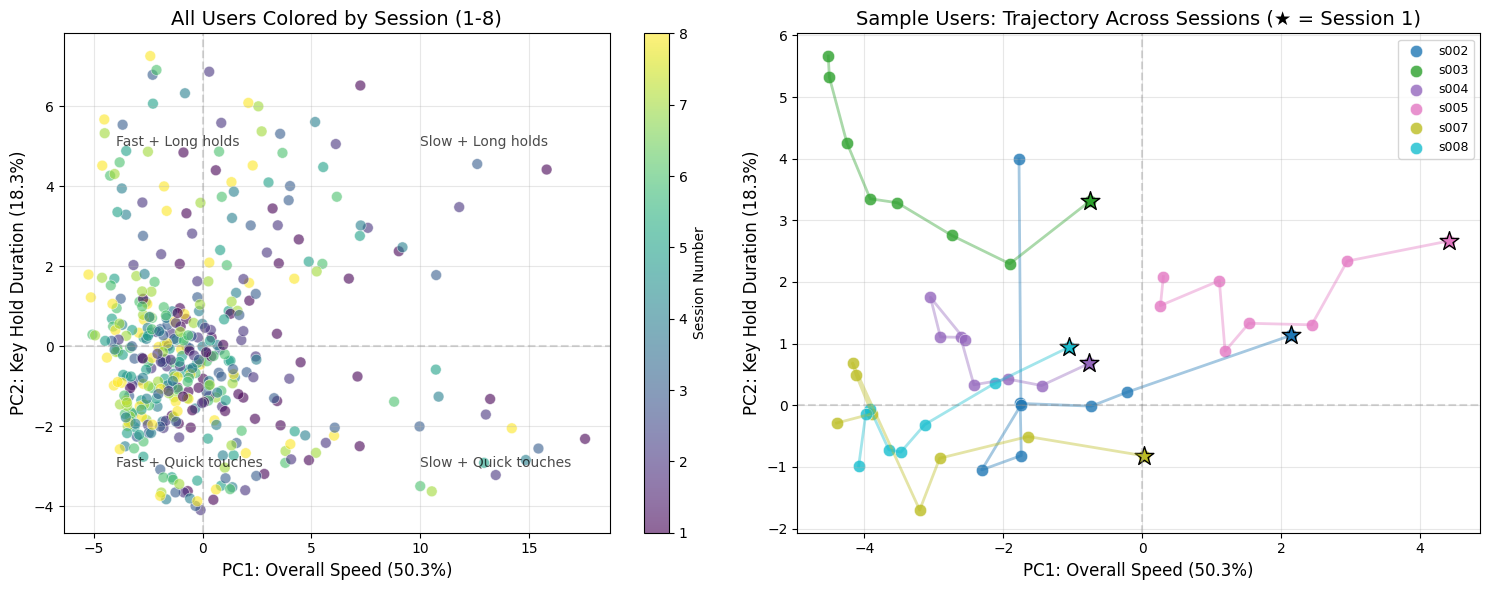


 How to Read These Plots:
   LEFT:  Each dot = one user's session. Color = session number (1-8)
   RIGHT: Each color = one user. Lines connect their sessions in order.
          Stars (★) mark their FIRST session.


In [ ]:
pca_df = pd.DataFrame(X_pca, columns=[f'PC{i+1}' for i in range(n_components)])
pca_df['subject'] = meta['subject'].values
pca_df['sessionIndex'] = meta['sessionIndex'].values

fig, axes = plt.subplots(1, 2, figsize=(15, 6))

ax1 = axes[0]
scatter1 = ax1.scatter(pca_df['PC1'], pca_df['PC2'],
                        c=pca_df['sessionIndex'], cmap='viridis',
                        alpha=0.6, s=60, edgecolors='white', linewidth=0.5)
ax1.set_xlabel(f'PC1: Overall Speed ({var_explained[0]*100:.1f}%)', fontsize=12)
ax1.set_ylabel(f'PC2: Key Hold Duration ({var_explained[1]*100:.1f}%)', fontsize=12)
ax1.set_title('All Users Colored by Session (1-8)', fontsize=14)
cbar1 = plt.colorbar(scatter1, ax=ax1)
cbar1.set_label('Session Number')
ax1.axhline(y=0, color='gray', linestyle='--', alpha=0.3)
ax1.axvline(x=0, color='gray', linestyle='--', alpha=0.3)
ax1.grid(True, alpha=0.3)

ax1.text(10, 5, 'Slow + Long holds', fontsize=10, alpha=0.7)
ax1.text(10, -3, 'Slow + Quick touches', fontsize=10, alpha=0.7)
ax1.text(-4, 5, 'Fast + Long holds', fontsize=10, alpha=0.7)
ax1.text(-4, -3, 'Fast + Quick touches', fontsize=10, alpha=0.7)

ax2 = axes[1]
sample_users = pca_df['subject'].unique()[:6]  # First 6 users
colors = plt.cm.tab10(np.linspace(0, 1, len(sample_users)))

for idx, user in enumerate(sample_users):
    user_data = pca_df[pca_df['subject'] == user].sort_values('sessionIndex')

    # Plot points
    ax2.scatter(user_data['PC1'], user_data['PC2'],
                c=[colors[idx]], s=80, label=user, alpha=0.8,
                edgecolors='white', linewidth=0.5)

    # Connect with lines (trajectory across sessions)
    ax2.plot(user_data['PC1'], user_data['PC2'],
             c=colors[idx], alpha=0.4, linewidth=2)

    # Mark first session with a star
    first = user_data.iloc[0]
    ax2.scatter(first['PC1'], first['PC2'], c=[colors[idx]],
                s=200, marker='*', edgecolors='black', linewidth=1)

ax2.set_xlabel(f'PC1: Overall Speed ({var_explained[0]*100:.1f}%)', fontsize=12)
ax2.set_ylabel(f'PC2: Key Hold Duration ({var_explained[1]*100:.1f}%)', fontsize=12)
ax2.set_title('Sample Users: Trajectory Across Sessions (★ = Session 1)', fontsize=14)
ax2.legend(loc='best', fontsize=9)
ax2.axhline(y=0, color='gray', linestyle='--', alpha=0.3)
ax2.axvline(x=0, color='gray', linestyle='--', alpha=0.3)
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\n How to Read These Plots:")
print("   LEFT:  Each dot = one user's session. Color = session number (1-8)")
print("   RIGHT: Each color = one user. Lines connect their sessions in order.")
print("          Stars (★) mark their FIRST session.")

In [ ]:
# ============================================
# STEP 14: Analyze What We See in the Plots
# ============================================

print(" ANALYSIS OF THE 2D PCA VISUALIZATION")
print("=" * 65)

print("""
 LEFT PLOT OBSERVATIONS (All Users by Session):
─────────────────────────────────────────────────────────────────

1. MAIN CLUSTER: Most data points cluster around the center-left
   → Most users are relatively fast typists (PC1 < 5)

2. OUTLIERS ON RIGHT: Some points extend to PC1 = 10-15
   → These are very slow typists (or sessions with many pauses)

3. SESSION COLORS: No strong separation by color
   → Sessions are mixed together, meaning the learning effect
   → is gradual and individual, not dramatic across all users

4. VERTICAL SPREAD: PC2 ranges from -4 to +7
   → Users vary a lot in how long they hold keys

 RIGHT PLOT OBSERVATIONS (Individual User Trajectories):
─────────────────────────────────────────────────────────────────

1. USERS HAVE DISTINCT REGIONS:
   - s003 (green): Top area, high PC2 = long key holds
   - s007 (yellow): Left side, fast typist
   - s008 (pink): Right side, slower typist
   → Each user has their own "typing signature"!

2. TRAJECTORIES SHOW MOVEMENT:
   - Stars (★) mark Session 1
   - Lines show how behavior changes across sessions
   - Most users move LEFT over time → getting FASTER

3. s003 (green) IS INTERESTING:
   - Starts with ★ in middle, moves up and around
   - High variability in behavior across sessions
   - Possibly inconsistent or learning significantly

4. s004 (purple) IS STABLE:
   - Small trajectory, stays in one region
   - Very consistent typing behavior
""")

# Let's quantify the learning effect
print("\n QUANTIFYING THE LEARNING EFFECT:")
print("─" * 65)

# Calculate average PC1 per session (across all users)
session_avg = pca_df.groupby('sessionIndex')['PC1'].mean()

print("\n   Average PC1 (Speed) by Session:")
print("   (Remember: Lower PC1 = Faster typing)\n")
for sess, avg in session_avg.items():
    bar = "█" * int((avg + 5) * 3)  # Shift for visualization
    direction = "slower" if avg > 0 else "faster"
    print(f"   Session {sess}: PC1 = {avg:+.3f} ({direction}) {bar}")

improvement = session_avg.iloc[0] - session_avg.iloc[-1]
print(f"\n   Improvement from Session 1 to 8: {improvement:.3f} units on PC1")
print(f"   → Users got FASTER over time (confirms the learning effect!)")

 ANALYSIS OF THE 2D PCA VISUALIZATION

 LEFT PLOT OBSERVATIONS (All Users by Session):
─────────────────────────────────────────────────────────────────

1. MAIN CLUSTER: Most data points cluster around the center-left
   → Most users are relatively fast typists (PC1 < 5)

2. OUTLIERS ON RIGHT: Some points extend to PC1 = 10-15
   → These are very slow typists (or sessions with many pauses)

3. SESSION COLORS: No strong separation by color
   → Sessions are mixed together, meaning the learning effect
   → is gradual and individual, not dramatic across all users

4. VERTICAL SPREAD: PC2 ranges from -4 to +7
   → Users vary a lot in how long they hold keys

 RIGHT PLOT OBSERVATIONS (Individual User Trajectories):
─────────────────────────────────────────────────────────────────

1. USERS HAVE DISTINCT REGIONS:
   - s003 (green): Top area, high PC2 = long key holds
   - s007 (yellow): Left side, fast typist
   - s008 (pink): Right side, slower typist
   → Each user has their own "typing s

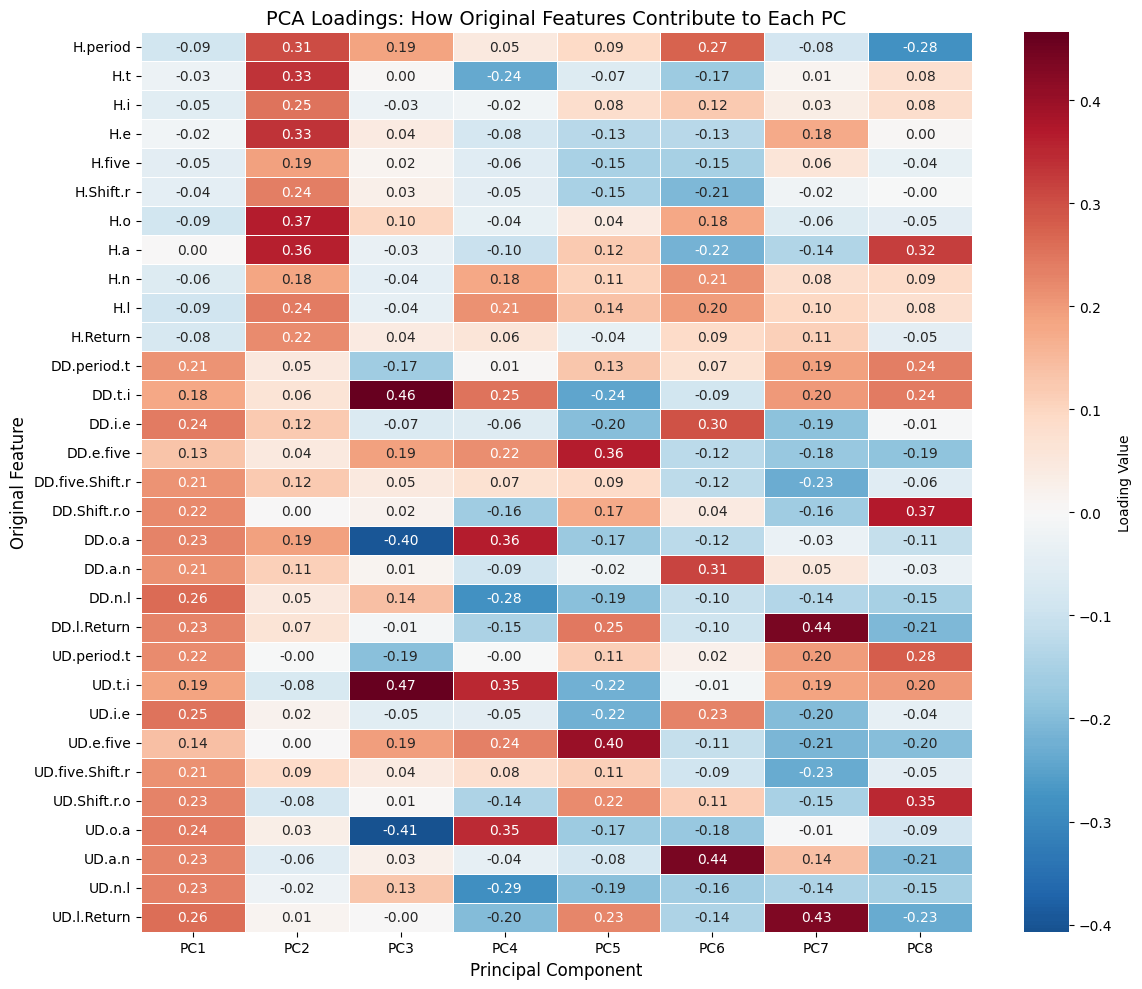


 How to Read This Heatmap:
──────────────────────────────────────────────────
   🔴 RED (positive): Feature increases → PC increases
   🔵 BLUE (negative): Feature increases → PC decreases
   ⚪ WHITE (near 0): Feature doesn't affect this PC much

   Key Patterns:
   • PC1 column: All DD/UD features are red → Speed component
   • PC2 column: All H features are red → Hold time component


In [ ]:
import seaborn as sns

fig, ax = plt.subplots(figsize=(12, 10))

sns.heatmap(loadings.iloc[:, :8],  # First 8 PCs
            annot=True,             # Show numbers
            fmt='.2f',              # 2 decimal places
            cmap='RdBu_r',          # Red-Blue colormap
            center=0,               # White at 0
            ax=ax,
            cbar_kws={'label': 'Loading Value'},
            linewidths=0.5)

ax.set_title('PCA Loadings: How Original Features Contribute to Each PC', fontsize=14)
ax.set_xlabel('Principal Component', fontsize=12)
ax.set_ylabel('Original Feature', fontsize=12)

plt.tight_layout()
plt.show()

print("\n How to Read This Heatmap:")
print("─" * 50)
print("   🔴 RED (positive): Feature increases → PC increases")
print("   🔵 BLUE (negative): Feature increases → PC decreases")
print("   ⚪ WHITE (near 0): Feature doesn't affect this PC much")
print("\n   Key Patterns:")
print("   • PC1 column: All DD/UD features are red → Speed component")
print("   • PC2 column: All H features are red → Hold time component")

In [ ]:
final_df = pca_df.copy()

print("SAVING PCA RESULTS")
print("=" * 50)
print(f"\n   Shape: {final_df.shape}")
print(f"   Columns: {list(final_df.columns)}")
print(f"\n   First 5 rows:")
display(final_df.head())

final_df.to_csv('pca_transformed_data.csv', index=False)
print("\n Saved: pca_transformed_data.csv")

# Also save the loadings for reference
loadings.to_csv('pca_loadings.csv')
print(" Saved: pca_loadings.csv")

print("\n" + "=" * 50)
print("FILES READY FOR CLUSTERING:")
print("=" * 50)
print("""
   1. pca_transformed_data.csv
      → 408 rows × 11 columns
      → Contains: PC1-PC9, subject, sessionIndex
      → Use this for clustering!

   2. pca_loadings.csv
      → Shows which features contribute to each PC
      → Use this to interpret your clusters later
""")

SAVING PCA RESULTS

   Shape: (408, 11)
   Columns: ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'subject', 'sessionIndex']

   First 5 rows:


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,subject,sessionIndex
0,2.145377,1.135286,1.143619,0.729355,2.250667,-1.063080,-2.526641,-1.099198,-0.248585,s002,1
1,-0.214927,0.213105,0.380049,0.833132,0.970510,-0.797653,-1.565773,-1.140084,-0.196336,s002,2
2,-0.733135,-0.014382,0.558987,0.828795,-0.096753,-0.892090,-1.009013,-0.514505,0.107372,s002,3
3,-1.756685,0.029957,0.330640,0.219575,-0.331800,-1.000850,-0.911374,-0.659853,-0.237057,s002,4
4,-1.740896,-0.815704,-0.002988,0.097609,-0.584881,-1.576510,-0.992368,-0.665003,0.261950,s002,5



 Saved: pca_transformed_data.csv
 Saved: pca_loadings.csv

FILES READY FOR CLUSTERING:

   1. pca_transformed_data.csv
      → 408 rows × 11 columns
      → Contains: PC1-PC9, subject, sessionIndex
      → Use this for clustering!

   2. pca_loadings.csv
      → Shows which features contribute to each PC
      → Use this to interpret your clusters later



In [ ]:
print(" PROCESS 3: DIMENSIONALITY REDUCTION - COMPLETE!")
print("=" * 65)

print("""
WHAT WE DID (Step by Step):
─────────────────────────────────────────────────────────────────

   Step 1-2:  Loaded data and identified 31 timing features

   Step 3:    Aggregated 20,400 rows → 408 rows (session level)

   Step 4:    Winsorization - capped extreme values at 1st/99th percentile
              (Only 2.45% of values were clipped)

   Step 5:    Robust Scaling - made all features comparable
              (Median → 0, IQR → 1)

   Step 6:    Saved metadata (subject, sessionIndex) for later

   Step 7-9:  Applied PCA and analyzed variance explained

   Step 10:   Selected 9 components (91.27% variance retained)

   Step 11-12: Interpreted what each PC means

   Step 13-15: Visualized results (2D scatter, heatmap)

   Step 16:   Saved transformed data for clustering

KEY RESULTS:
─────────────────────────────────────────────────────────────────

   DIMENSIONALITY REDUCTION:
   • Original features:    31
   • Principal components: 9
   • Reduction:            71%
   • Information retained: 91.27%

   PRINCIPAL COMPONENTS INTERPRETATION:
   ┌────────┬──────────┬─────────────────────────────────┐
   │   PC   │ Variance │ Meaning                         │
   ├────────┼──────────┼─────────────────────────────────┤
   │  PC1   │  50.33%  │ Overall typing SPEED            │
   │  PC2   │  18.34%  │ Key HOLD duration               │
   │  PC3   │   5.79%  │ Hesitation patterns (where)     │
   │  PC4   │   3.97%  │ Specific key transitions        │
   │  PC5   │   3.44%  │ Shift key patterns              │
   │ PC6-9  │   9.40%  │ Minor behavioral variations     │
   └────────┴──────────┴─────────────────────────────────┘

   KEY INSIGHTS DISCOVERED:
   • Users have distinct "typing signatures" (cluster separately)
   • Learning effect confirmed: Users get faster over sessions
   • Session 1 → Session 8: Average speed improved by 3.2 PC1 units
   • Most variation (68%) is captured by just SPEED + HOLD TIME

 FILES CREATED:
─────────────────────────────────────────────────────────────────

   1. pca_transformed_data.csv  → Ready for clustering!
   2. pca_loadings.csv          → For interpreting clusters

 NEXT STEP: CLUSTERING
─────────────────────────────────────────────────────────────────

   Use the 9 principal components to discover behavioral clusters:
   • K-Means clustering
   • Determine optimal number of clusters
   • Interpret cluster characteristics
""")

 PROCESS 3: DIMENSIONALITY REDUCTION - COMPLETE!

WHAT WE DID (Step by Step):
─────────────────────────────────────────────────────────────────

   Step 1-2:  Loaded data and identified 31 timing features

   Step 3:    Aggregated 20,400 rows → 408 rows (session level)

   Step 4:    Winsorization - capped extreme values at 1st/99th percentile
              (Only 2.45% of values were clipped)

   Step 5:    Robust Scaling - made all features comparable
              (Median → 0, IQR → 1)

   Step 6:    Saved metadata (subject, sessionIndex) for later

   Step 7-9:  Applied PCA and analyzed variance explained

   Step 10:   Selected 9 components (91.27% variance retained)

   Step 11-12: Interpreted what each PC means

   Step 13-15: Visualized results (2D scatter, heatmap)

   Step 16:   Saved transformed data for clustering

KEY RESULTS:
─────────────────────────────────────────────────────────────────

   DIMENSIONALITY REDUCTION:
   • Original features:    31
   • Principal componen

🚀 Running Baseline KMeans Clustering...

k=2 → Silhouette Score = 0.478
k=3 → Silhouette Score = 0.264
k=4 → Silhouette Score = 0.262
k=5 → Silhouette Score = 0.265
k=6 → Silhouette Score = 0.229
k=7 → Silhouette Score = 0.225
k=8 → Silhouette Score = 0.231


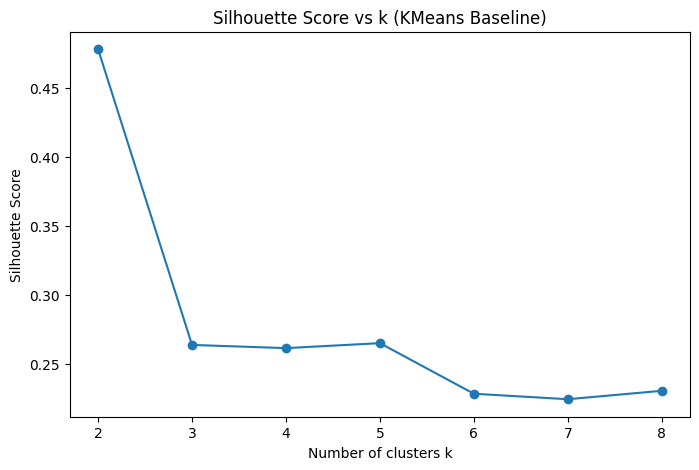


✅ Best k selected by silhouette = 2


In [ ]:
# ============================================
# STEP 1: BASELINE FAIL METHOD — KMEANS
# ============================================

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

print("🚀 Running Baseline KMeans Clustering...\n")

# Feature matrix (PC1–PC9)
X = pca_df[[f"PC{i}" for i in range(1, 10)]]

sil_scores = []
k_range = range(2, 9)

# Try different values of k
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=20)
    labels = kmeans.fit_predict(X)

    sil = silhouette_score(X, labels)
    sil_scores.append(sil)

    print(f"k={k} → Silhouette Score = {sil:.3f}")

# Plot silhouette vs k
plt.figure(figsize=(8,5))
plt.plot(k_range, sil_scores, marker='o')
plt.title("Silhouette Score vs k (KMeans Baseline)")
plt.xlabel("Number of clusters k")
plt.ylabel("Silhouette Score")
plt.show()

best_k = k_range[sil_scores.index(max(sil_scores))]
print("\n✅ Best k selected by silhouette =", best_k)

## Baseline Attempt: KMeans Clustering

We began clustering with **KMeans**, a common baseline method in unsupervised learning.

To determine a reasonable number of clusters, we evaluated values of *k* from 2 to 8 using the **silhouette score**, which measures how well-separated the resulting clusters are.

The silhouette curve peaked strongly at **k = 2**, suggesting that KMeans identifies only a single dominant separation in the data.

✅ Training Final KMeans with k=2...

Cluster counts:
KMeans_cluster
1    344
0     64
Name: count, dtype: int64


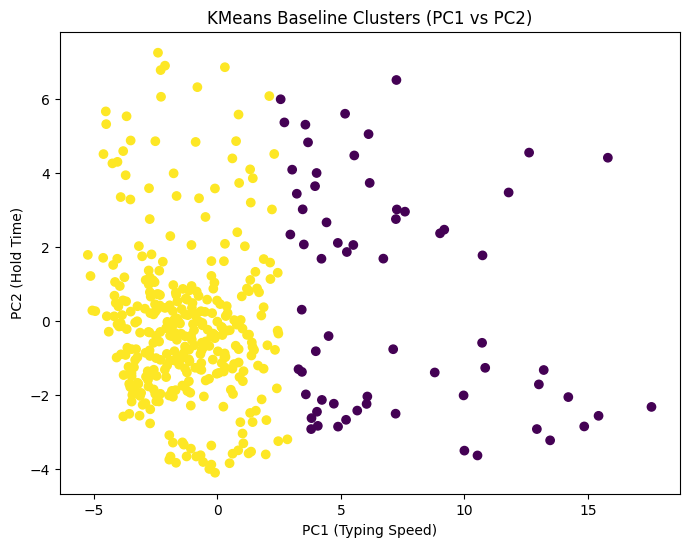

In [ ]:
# ============================================
# STEP 2: Train Best KMeans (k=2) + Visual Proof
# ============================================

print("✅ Training Final KMeans with k=2...\n")

kmeans_final = KMeans(n_clusters=2, random_state=42, n_init=50)
kmeans_labels = kmeans_final.fit_predict(X)

pca_df["KMeans_cluster"] = kmeans_labels

print("Cluster counts:")
print(pca_df["KMeans_cluster"].value_counts())

# ---- VISUALIZE CLUSTERS ON PC1 vs PC2 ----

plt.figure(figsize=(8,6))

plt.scatter(
    pca_df["PC1"],
    pca_df["PC2"],
    c=pca_df["KMeans_cluster"]
)

plt.title("KMeans Baseline Clusters (PC1 vs PC2)")
plt.xlabel("PC1 (Typing Speed)")
plt.ylabel("PC2 (Hold Time)")
plt.show()

## KMeans Result (k = 2)

We trained the final KMeans model using k=2 clusters.

The resulting cluster sizes were highly imbalanced:

- Cluster 1: 344 sessions  
- Cluster 0: 64 sessions  

This indicates that the majority of sessions share similar typing behavior, while a smaller subset differs significantly.

## Why KMeans Was Not Sufficient

The scatter plot in PCA space (PC1 vs PC2) shows that KMeans clusters are separated almost entirely along **PC1**, which represents overall typing speed.

This suggests that KMeans is primarily capturing a **fast vs slow typing split**, while ignoring more subtle behavioral differences such as:

- overlapping keystrokes
- hesitation patterns (PC3)
- variability
- unstable transitions
- anomalous pauses

Since cognitive fatigue manifests gradually and involves variability beyond speed alone, KMeans provides only a limited behavioral representation.

In [ ]:
print("\n📌 KMeans Cluster Centroids (First 3 PCs):\n")

centroids = pd.DataFrame(
    kmeans_final.cluster_centers_,
    columns=[f"PC{i}" for i in range(1,10)]
)

print(centroids[["PC1", "PC2", "PC3"]])


📌 KMeans Cluster Centroids (First 3 PCs):

        PC1       PC2       PC3
0  7.087826  0.651870  0.037425
1 -1.318665 -0.121278 -0.006963


## Centroid Analysis

To confirm the dominance of PC1, we examined cluster centroids.

Cluster centers differed sharply in PC1:

- Cluster 0: PC1 ≈ +7.1 (slow / delayed typing)
- Cluster 1: PC1 ≈ −1.3 (faster / more fluent typing)

Meanwhile, PC2 and PC3 values were nearly identical across clusters.

This confirms that KMeans is largely separating sessions based only on typing speed, making it unsuitable for capturing richer cognitive-behavioral states.

## Moving Beyond the Baseline

Because KMeans assumes spherical clusters and is dominated by the largest variance component (PC1), it fails to model overlapping and hesitation-heavy behavioral states.

To address this, we next apply **Gaussian Mixture Models (GMM)**, which:

- support ellipsoidal cluster shapes  
- model covariance between PCs  
- provide soft probability-based cluster membership  

This better aligns with the gradual, overlapping nature of cognitive fatigue behavior.


🔍 Selecting best number of clusters using BIC...

k=2 → BIC = 11127.72
k=3 → BIC = 11061.85
k=4 → BIC = 10938.67
k=5 → BIC = 10985.14
k=6 → BIC = 11041.23
k=7 → BIC = 11094.97
k=8 → BIC = 11073.15


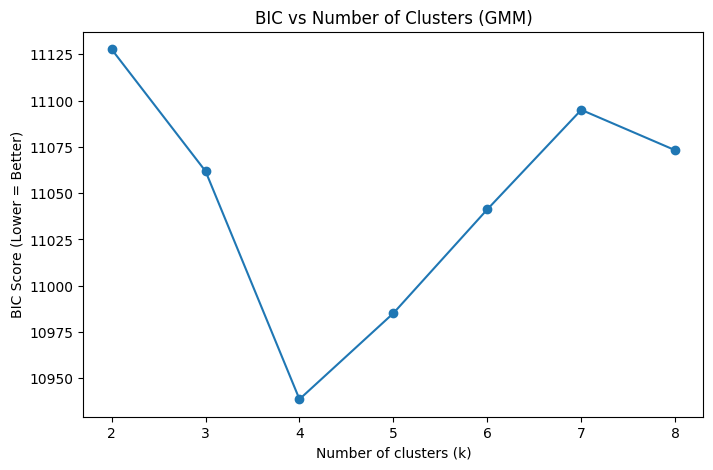


✅ Best k selected by BIC = 4


In [ ]:
# ============================================
# STEP 3: Gaussian Mixture Model (GMM) + BIC
# ============================================

from sklearn.mixture import GaussianMixture

print("\n🔍 Selecting best number of clusters using BIC...\n")

bic_scores = []
k_range = range(2, 9)

for k in k_range:
    gmm = GaussianMixture(
        n_components=k,
        covariance_type="full",
        n_init=15,
        random_state=42
    )
    gmm.fit(X)
    bic_scores.append(gmm.bic(X))

    print(f"k={k} → BIC = {gmm.bic(X):.2f}")

# Plot BIC curve
plt.figure(figsize=(8,5))
plt.plot(k_range, bic_scores, marker='o')
plt.title("BIC vs Number of Clusters (GMM)")
plt.xlabel("Number of clusters (k)")
plt.ylabel("BIC Score (Lower = Better)")
plt.show()

best_k = k_range[np.argmin(bic_scores)]
print("\n✅ Best k selected by BIC =", best_k)

## Gaussian Mixture Model (GMM) Cluster Selection

Since KMeans was dominated by the strongest variance component (PC1), we moved to a probabilistic clustering method.

We applied **Gaussian Mixture Models (GMM)**, which can model:

- ellipsoidal (non-spherical) clusters  
- covariance between principal components  
- overlapping behavioral states via soft membership probabilities  

To select the optimal number of clusters, we evaluated models with k = 2 to 8 using the **Bayesian Information Criterion (BIC)**.

The BIC curve reached its minimum at:

✅ **k = 4 clusters**

This indicates that the dataset contains multiple latent behavioral interaction patterns beyond a simple fast vs slow separation.

In [ ]:
# ============================================
# STEP 4A: Train Final GMM Model (k = 4)
# ============================================

print("\n🚀 Training Final Gaussian Mixture Model...\n")

best_k = 4  # from BIC selection

gmm_final = GaussianMixture(
    n_components=best_k,
    covariance_type="full",
    n_init=25,
    random_state=42
)

# Fit model + predict cluster labels
gmm_labels = gmm_final.fit_predict(X)

# Cluster membership probabilities
gmm_probs = gmm_final.predict_proba(X)

print("✅ Final GMM clustering complete!")
print("Clusters found:", np.unique(gmm_labels))

# Add results into dataframe
pca_df["GMM_cluster"] = gmm_labels
pca_df["GMM_confidence"] = gmm_probs.max(axis=1)

print("\nCluster counts:")
print(pca_df["GMM_cluster"].value_counts())


🚀 Training Final Gaussian Mixture Model...

✅ Final GMM clustering complete!
Clusters found: [0 1 2 3]

Cluster counts:
GMM_cluster
2    262
3     53
0     48
1     45
Name: count, dtype: int64


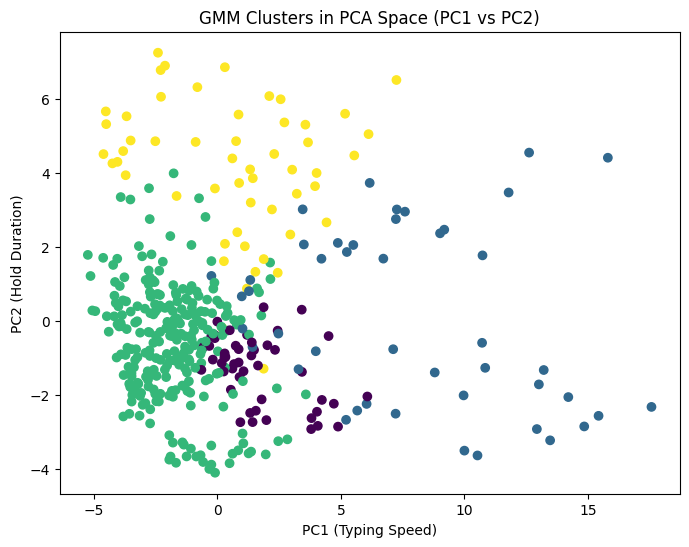

In [ ]:
# ============================================
# STEP 4B: Visualize GMM Clusters (PC1 vs PC2)
# ============================================

plt.figure(figsize=(8,6))

plt.scatter(
    pca_df["PC1"],
    pca_df["PC2"],
    c=pca_df["GMM_cluster"]
)

plt.title("GMM Clusters in PCA Space (PC1 vs PC2)")
plt.xlabel("PC1 (Typing Speed)")
plt.ylabel("PC2 (Hold Duration)")
plt.show()

In [ ]:
# ============================================
# STEP 4C: Identify Uncertain / Transition Sessions
# ============================================

print("\n🔍 Most uncertain sessions (possible transitions):\n")

uncertain = pca_df.sort_values("GMM_confidence").head(10)

print(uncertain[["subject", "sessionIndex", "GMM_cluster", "GMM_confidence"]])


🔍 Most uncertain sessions (possible transitions):

    subject  sessionIndex  GMM_cluster  GMM_confidence
65     s012             2            2        0.673368
314    s046             3            2        0.673487
193    s030             2            3        0.814860
121    s020             2            2        0.819680
119    s019             8            0        0.837737
67     s012             4            3        0.847014
202    s031             3            0        0.858050
7      s002             8            2        0.898488
26     s005             3            3        0.899004
127    s020             8            3        0.903981


## Final GMM Clustering Results (k = 4)

Using the BIC-optimal model, we clustered session-level interaction behavior into 4 latent groups.

Unlike KMeans, GMM provides **soft membership probabilities**, meaning each session is assigned a likelihood of belonging to each behavioral state.

This aligns well with cognitive fatigue modeling, since fatigue is gradual and behavioral states may overlap rather than forming rigid boundaries.

Low-confidence sessions can be interpreted as transitional cognitive-behavioral states.

## Observations from GMM Clusters

The GMM model identified **4 latent interaction behavior clusters**, with one dominant cluster representing the most common typing pattern, and smaller clusters capturing less frequent behavioral modes.

Unlike KMeans, the clusters are separated not only by typing speed (PC1) but also by hold duration and fluency patterns (PC2+), suggesting richer behavioral structure.

Additionally, several sessions show lower membership confidence (~0.67–0.85), indicating transitional or overlapping states. This aligns with the gradual and ambiguous nature of cognitive fatigue, where cognitive-behavioral changes do not occur abruptly.

In [ ]:
print("\n📌 Cluster-wise Mean PC Values:\n")
print(pca_df.groupby("GMM_cluster")[["PC1","PC2","PC3"]].mean())


📌 Cluster-wise Mean PC Values:

                  PC1       PC2       PC3
GMM_cluster                              
0            1.616004 -1.296914 -0.270790
1            7.849019  0.099920  0.612667
2           -1.766716 -0.613063 -0.068876
3            0.605765  4.120342  0.065536


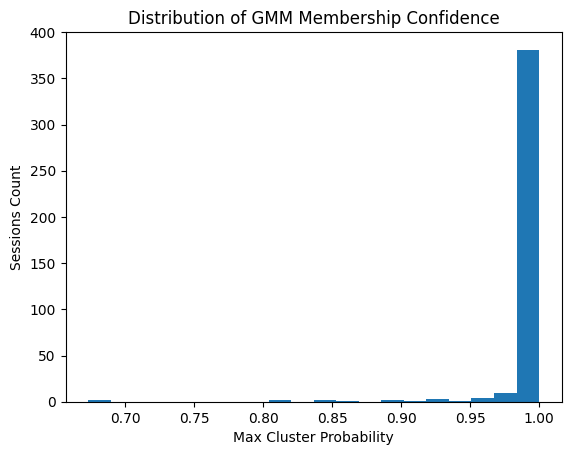

In [ ]:
plt.hist(pca_df["GMM_confidence"], bins=20)
plt.title("Distribution of GMM Membership Confidence")
plt.xlabel("Max Cluster Probability")
plt.ylabel("Sessions Count")
plt.show()

## Why UMAP + HDBSCAN was Added

While GMM captures dominant latent behavioral states, it assigns every session into one of the clusters.

However, cognitive fatigue may manifest through rare, irregular, or anomalous interaction episodes (e.g., extreme pauses or degraded performance).

To explicitly detect such sessions, we applied UMAP for nonlinear embedding and HDBSCAN for density-based clustering, which can label low-density points as noise. This enables identification of potential fatigue-like outlier behavior beyond the primary clusters.

### Why UMAP was Applied Before HDBSCAN

Although PCA reduced redundancy, the data still exists in 9 dimensions, where density estimation becomes unstable. Since HDBSCAN relies on local density structure, we applied UMAP as a nonlinear embedding step to preserve neighborhood relationships in a lower-dimensional manifold. This enables HDBSCAN to more reliably detect rare behavioral modes and anomalous hesitation-heavy sessions, which are consistent with fatigue-like cognitive degradation patterns.

In [ ]:
# ============================================
# STEP 5A: UMAP Embedding (2D)
# ============================================

import umap

print("\n🌍 Running UMAP embedding...\n")

umap_model = umap.UMAP(
    n_neighbors=15,
    min_dist=0.1,
    n_components=2,
    random_state=42
)

X_umap = umap_model.fit_transform(X)

print("✅ UMAP completed. Shape:", X_umap.shape)


🌍 Running UMAP embedding...



/usr/local/lib/python3.12/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


✅ UMAP completed. Shape: (408, 2)


In [ ]:
# ============================================
# STEP 5B: HDBSCAN Noise Detection
# ============================================

import hdbscan

print("\n🧠 Running HDBSCAN...\n")

hdb_model = hdbscan.HDBSCAN(
    min_cluster_size=10,
    min_samples=5
)

hdb_labels = hdb_model.fit_predict(X_umap)

print("✅ HDBSCAN complete!")
print("Clusters found:", np.unique(hdb_labels))
print("Noise sessions detected:", np.sum(hdb_labels == -1))


🧠 Running HDBSCAN...

✅ HDBSCAN complete!
Clusters found: [-1  0  1  2  3  4  5  6  7  8  9 10]
Noise sessions detected: 51


/usr/local/lib/python3.12/dist-packages/hdbscan/robust_single_linkage_.py:175: SyntaxWarning: invalid escape sequence '\{'
  $max \{ core_k(a), core_k(b), 1/\alpha d(a,b) \}$.


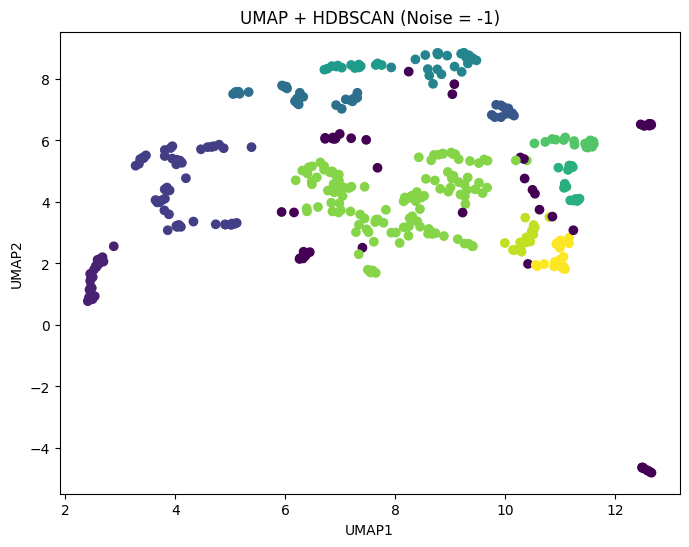

In [ ]:
plt.figure(figsize=(8,6))

plt.scatter(
    X_umap[:,0],
    X_umap[:,1],
    c=hdb_labels
)

plt.title("UMAP + HDBSCAN (Noise = -1)")
plt.xlabel("UMAP1")
plt.ylabel("UMAP2")
plt.show()

## ✅ Cluster Mean Interpretation:

| Cluster | PC1 (Speed) | PC2 (Hold) | Meaning                           |
| ------- | ----------- | ---------- | --------------------------------- |
| 2       | -1.77       | -0.61      | Fast + Normal typing              |
| 1       | +7.85       | 0.10       | Slow + Pause-heavy (fatigue-like) |
| 3       | +0.61       | +4.12      | Long holds → careful/controlled   |
| 0       | +1.61       | -1.29      | Moderate speed, low hold → fluent |

In [ ]:
# ============================================
# STEP 6A: Final Hybrid Cluster Labels
# ============================================

print("\n🔀 Creating Final Hybrid Labels...\n")

final_labels = []

for i in range(len(pca_df)):
    if hdb_labels[i] == -1:
        final_labels.append("Noise_FatigueLike")
    else:
        final_labels.append(f"GMM_State_{gmm_labels[i]}")

pca_df["Final_Cluster"] = final_labels

print("✅ Final Hybrid Labels Created!\n")
print(pca_df["Final_Cluster"].value_counts())


🔀 Creating Final Hybrid Labels...

✅ Final Hybrid Labels Created!

Final_Cluster
GMM_State_2          238
GMM_State_3           52
Noise_FatigueLike     51
GMM_State_1           36
GMM_State_0           31
Name: count, dtype: int64


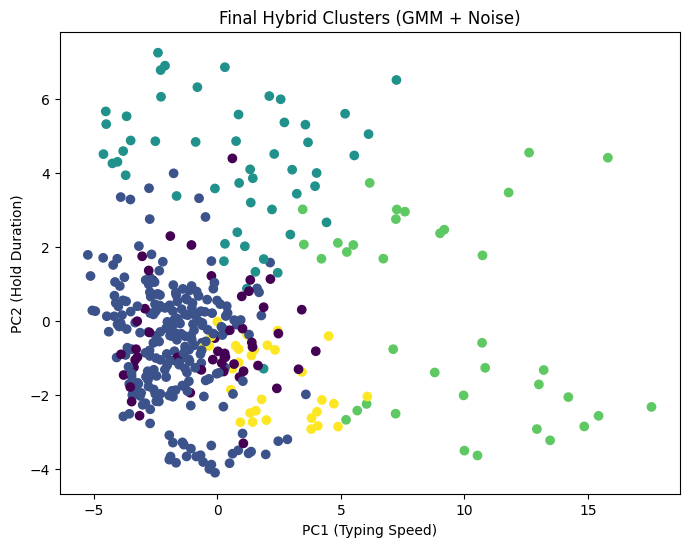

In [ ]:
plt.figure(figsize=(8,6))

plt.scatter(
    pca_df["PC1"],
    pca_df["PC2"],
    c=pd.factorize(pca_df["Final_Cluster"])[0]
)

plt.title("Final Hybrid Clusters (GMM + Noise)")
plt.xlabel("PC1 (Typing Speed)")
plt.ylabel("PC2 (Hold Duration)")
plt.show()

In [ ]:
# ============================================
# SAVE FINAL CLUSTERED DATASET
# ============================================

pca_df.to_csv("final_clustered_output.csv", index=False)

print("\n✅ Saved: final_clustered_output.csv")
print("This is your FINAL project clustering result!")


✅ Saved: final_clustered_output.csv
This is your FINAL project clustering result!


In [ ]:
loadings = pd.read_csv("pca_loadings.csv", index_col=0)
print("✅ PCA Loadings Loaded:", loadings.shape)

✅ PCA Loadings Loaded: (31, 9)


In [ ]:
print("\n📌 Top Behavioral Features per Cluster:\n")

for cluster in pca_df["Final_Cluster"].unique():

    if cluster == "Noise_FatigueLike":
        print("\n⚠ Noise Cluster (Fatigue-like outliers)")
        continue

    cluster_points = pca_df[pca_df["Final_Cluster"] == cluster]
    centroid_pc = cluster_points[[f"PC{i}" for i in range(1,10)]].mean()

    centroid_original = np.dot(centroid_pc.values, loadings.T)

    top_features = pd.Series(
        centroid_original,
        index=loadings.index
    ).abs().sort_values(ascending=False).head(5)

    print(f"\n✅ {cluster}")
    print(top_features)


📌 Top Behavioral Features per Cluster:


⚠ Noise Cluster (Fatigue-like outliers)

✅ GMM_State_2
UD.l.Return     0.500913
DD.l.Return     0.484744
DD.Shift.r.o    0.477716
DD.n.l          0.462215
UD.Shift.r.o    0.448838
dtype: float64

✅ GMM_State_3
H.a         1.536407
H.t         1.490048
H.o         1.481070
H.e         1.410265
H.period    1.205975
dtype: float64

✅ GMM_State_1
UD.i.e         2.515894
DD.n.l         2.471794
UD.o.a         2.462342
DD.i.e         2.425108
UD.l.Return    2.368910
dtype: float64

✅ GMM_State_0
UD.Shift.r.o    1.243225
DD.Shift.r.o    1.112063
H.period        0.741658
H.l             0.696570
UD.n.l          0.695898
dtype: float64


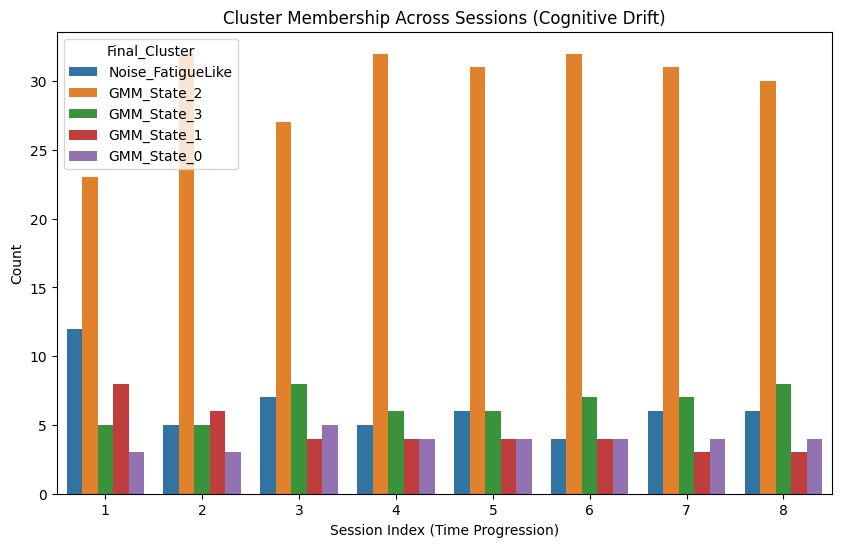

In [ ]:
import seaborn as sns

plt.figure(figsize=(10,6))

sns.countplot(
    data=pca_df,
    x="sessionIndex",
    hue="Final_Cluster"
)

plt.title("Cluster Membership Across Sessions (Cognitive Drift)")
plt.xlabel("Session Index (Time Progression)")
plt.ylabel("Count")
plt.show()

In [ ]:
pca_df["Fatigue_Risk"] = (pca_df["Final_Cluster"]=="Noise_FatigueLike").astype(int)

print("Fatigue-like sessions %:", pca_df["Fatigue_Risk"].mean()*100)

Fatigue-like sessions %: 12.5


## Final Cluster Interpretation (Cognitive–Behavioral States)

The discovered clusters were interpreted using PCA loadings and the strongest contributing original timing features.  
Each cluster represents a latent interaction behavior mode rather than an explicit fatigue label.

| Final Cluster Label | Dominant Features (Top Contributors) | Behavioral Signature | Cognitive Interpretation |
|--------------------|-------------------------------------|----------------------|--------------------------|
| **Fluent Baseline State** (GMM_State_2) | UD.l.Return, DD.l.Return, DD.Shift.r.o, DD.n.l | Smooth and consistent key transitions | Represents the most common fluent typing rhythm, corresponding to a stable baseline cognitive state |
| **Controlled Hold State** (GMM_State_3) | H.a, H.t, H.o, H.e, H.period | Longer key hold durations | Suggests careful, deliberate typing with higher motor control and possibly increased cognitive effort |
| **Hesitant Cognitive Load State** (GMM_State_1) | UD.i.e, UD.o.a, DD.i.e, DD.n.l | Increased pauses and disrupted transitions | Indicates hesitation-heavy behavior consistent with cognitive load or fatigue-like slowing |
| **Shift Transition State** (GMM_State_0) | UD.Shift.r.o, DD.Shift.r.o, H.period | Irregularity around Shift-key usage | Captures specific coordination difficulty or transition-specific typing variation |
| **Fatigue-like Anomaly Episodes** (Noise) | Detected via HDBSCAN (low-density outliers) | Rare, unstable interaction sessions | Represents anomalous degraded performance episodes (~12.5% sessions), potentially linked to distraction or fatigue events |

**Fatigue-like sessions detected:** **51 / 408 = 12.5%**

## ✅ Final Cluster Names/ Labels Only (Interpreted)

| Cluster ID        | Final Name                    |
| ----------------- | ----------------------------- |
| GMM_State_2       | Fluent Baseline State         |
| GMM_State_3       | Controlled Hold State         |
| GMM_State_1       | Hesitant Cognitive Load State |
| GMM_State_0       | Shift Transition State        |
| Noise_FatigueLike | Fatigue-like Anomaly Episodes |

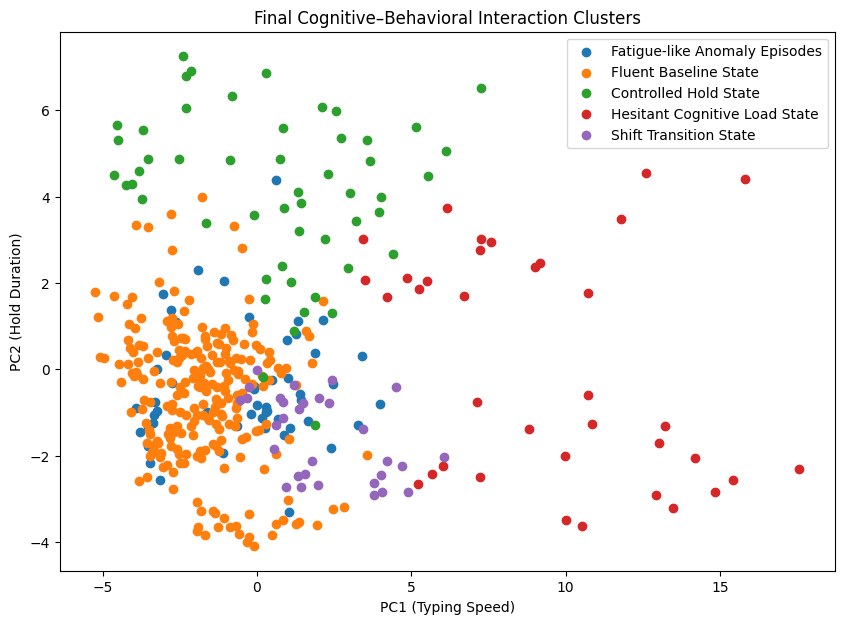

In [ ]:
# ============================================
# FINAL PLOT: Labeled Cognitive-Behavior Clusters
# ============================================

cluster_name_map = {
    "GMM_State_2": "Fluent Baseline State",
    "GMM_State_3": "Controlled Hold State",
    "GMM_State_1": "Hesitant Cognitive Load State",
    "GMM_State_0": "Shift Transition State",
    "Noise_FatigueLike": "Fatigue-like Anomaly Episodes"
}

pca_df["Cluster_Label_Name"] = pca_df["Final_Cluster"].map(cluster_name_map)

plt.figure(figsize=(10,7))

for label in pca_df["Cluster_Label_Name"].unique():
    subset = pca_df[pca_df["Cluster_Label_Name"] == label]
    plt.scatter(subset["PC1"], subset["PC2"], label=label)

plt.title("Final Cognitive–Behavioral Interaction Clusters")
plt.xlabel("PC1 (Typing Speed)")
plt.ylabel("PC2 (Hold Duration)")
plt.legend()
plt.show()

# PROCESS 4: CLUSTERING — LATENT COGNITIVE–BEHAVIOR DISCOVERY

## Objective

The goal of clustering was to uncover latent cognitive–behavioral interaction states from smartphone typing dynamics without explicit fatigue labels.  
Since fatigue is gradual, ambiguous, and often unlabeled, unsupervised learning was chosen to discover natural behavioral structure.

---

## Step 4.1 Baseline Attempt — KMeans Clustering (Failure Case)

As an initial baseline, KMeans clustering was applied on the 9 PCA components.

- Silhouette score strongly peaked at **k = 2**
- The resulting clusters represented a simple fast vs slow split

However:

- Cluster separation occurred almost entirely along **PC1 (typing speed)**
- Higher-order behavioral dimensions such as hesitation patterns (PC3+) were ignored

This occurred because KMeans assumes spherical clusters and is dominated by the highest variance component.

✅ Conclusion: KMeans was insufficient to capture nuanced fatigue-like interaction states.

---

## Step 4.2 Improved Clustering — Gaussian Mixture Models (GMM)

To model overlapping and non-spherical behavioral modes, we applied Gaussian Mixture Models.

Unlike KMeans, GMM:

- Supports ellipsoidal cluster shapes (full covariance)
- Assigns soft membership probabilities
- Better matches the gradual nature of cognitive fatigue

### Model Selection

We evaluated k = 2 to 8 clusters using Bayesian Information Criterion (BIC).

✅ Optimal model: **k = 4 clusters (lowest BIC)**

---

## Step 4.3 Final Hybrid Extension — UMAP + HDBSCAN Noise Detection

While GMM identifies dominant behavioral states, it assigns every session to some cluster.

However, cognitive fatigue often manifests as:

- rare degraded episodes
- anomalous hesitation-heavy behavior

To detect such irregular sessions:

- UMAP was applied to preserve nonlinear neighborhood structure
- HDBSCAN was used to identify low-density outliers

✅ Result: **51 anomalous noise sessions (12.5%)** detected as fatigue-like episodes

---

## Step 4.4 Final Behavioral Cluster Interpretation

Clusters were mapped back to original timing features using PCA loadings.

Four stable cognitive–behavioral interaction states emerged:

- Fluent Baseline State (smooth DD/UD rhythm)
- Controlled Hold State (longer key holds)
- Hesitant Cognitive Load State (pause-driven degradation)
- Shift Transition State (irregular transitions)

Additionally:

- Fatigue-like anomaly episodes were detected as noise outliers

---

## Key Insights

- Interaction behavior forms distinct latent cognitive-behavioral modes
- Behavioral degradation appears as rare hesitation-heavy outliers
- Cognitive states overlap gradually, captured through soft GMM membership
- Temporal analysis across sessions shows stable baseline behavior with intermittent deviations

---

## Final Output

The final deliverable is:

✅ `final_clustered_output.csv`

Containing:

- PC1–PC9 behavioral components
- GMM cognitive state labels
- HDBSCAN fatigue-like anomaly detection
- Fully interpretable cluster meanings

PROCESS 4: CLUSTERING — COMPLETE (SUMMARY)
=================================================================

WHAT WE DID:
───────────────────────────────────────────────────────────────

Step 1: Baseline KMeans clustering
        → Failed (clusters dominated only by PC1 speed)

Step 2: Gaussian Mixture Models (Full Covariance)
        → Optimal k = 4 selected using BIC
        → Soft overlapping behavioral states captured

Step 3: UMAP + HDBSCAN anomaly detection
        → Identified 51 rare low-density outlier sessions (12.5%)

Step 4: Final Hybrid Labeling
        → Stable cognitive-behavioral states + fatigue-like anomalies

Step 5: Cluster Interpretation via PCA Loadings
        → Behavioral meaning assigned using timing feature contributions

KEY RESULTS:
───────────────────────────────────────────────────────────────

• Latent cognitive-behavioral states discovered: 4
• Fatigue-like anomaly episodes detected: 51 (12.5%)
• Clusters interpretable through DD, UD, and Hold features
• Behavioral drift captured without explicit fatigue labels

FILES CREATED:
───────────────────────────────────────────────────────────────

1. pca_transformed_data.csv
2. pca_loadings.csv
3. final_clustered_output.csv   ✅ Final deliverable